In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def inspect(df):
    print(df.info())
    print()
    display(df.head())

In [5]:
meals = pd.read_csv('C:/Users/mahad/OneDrive/Desktop/team3/meal_info.csv')

inspect(meals)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None



meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [6]:
fulf_ctr = pd.read_csv('C:/Users/mahad/OneDrive/Desktop/team3/fulfilment_center_info.csv')

inspect(fulf_ctr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB
None



center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [7]:
fulf_ctr[fulf_ctr.center_id==10]

center_id  city_code  region_code center_type  op_area
56         10        590           56      TYPE_B      6.3

In [12]:
demand_weekly = pd.read_csv('C:/Users/mahad/OneDrive/Desktop/team3/train.csv')
demand_weekly_test = pd.read_csv('C:/Users/mahad/OneDrive/Desktop/team3/test.csv')
inspect(demand_weekly)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None



id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

#### Problem Understanding/Definition: <br>

#### Data understanding: <br>
Here each row represents a meal. The number of orders col tells us how many times that meal was ordered in the corresponding week. <br>
The emailer for promotion column tells us if an email was sent to promote that food that week or not <br>
We can also see if it was featured on the homepage or not. <br>
Our data has a whooping 456,548 non-null features (so we dont have to deal with missing values)<br>

We have another interesting column; the center_id which tells us the fulfilment center that fulfiled all the orders that came in for a particular meal on a particular week <br>
<br>
Unfortunately we have nothing to decode the various regions and cities<br>
We also have nothing to decode the exact meal that was ordered, we can only use the numbers in these cases. <br>
Idea: for meals we can use either the cuisine group or the category (which is the type of product) they fall under<br>
<br>
#### Business understanding: <br>
We are trying to forecast the amount of orders that might come in for each meal for each fulfilment center for the subsequent weeks<br>
<br>
We need to visualize a trend of the number of orders that came in each week for each meal at each fulfilment center<br>
<br>
We need to also do some kind of EDA to tell us if theres some correlation with the number of orders a meal type gets each week and other variables such as promotion_emails, homepage_featured or the prices or the region <br>
<br>
We can use regression to find important variables that contribute to forecasting how many number of orders we should expect in a week given say for instance the fulfilment center, the type of meal it is, and cuisine

In [13]:
inspect(demand_weekly_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB
None



id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

In the test file we are given the center type, information on if the meal was promoted, and the price of the meal <br>

Our approach to solving the food demand forecast is definitely a time-series-analysis or 'tsa' approach however, I want to try to see if we can build a regression model which is a non-tsa approach<br>
to see if we can obtain some relationships for food demand and to see if there are any underlying patterns.
<br>
<br>
Because if there are, we can build a regressor model that does well in predicting the amount of orders that would come in given certain features and we can combine the results of that model with our<br>
tsa model to come to some conclusion with what the amount a fulfilment center should expect in the coming week
<br>

That being said lets do some data exploration to learn more bout our data

In [14]:
meals.nunique()

# 51 different meals
# 14 different products
# only 4 cuisines

meal_id     51
category    14
cuisine      4
dtype: int64

In [15]:
# so what different categories of food are there & cuisine
print(f'Food categories: \n{meals.category.unique()} \n\nFood cuisines: \n{meals.cuisine.unique()}')

Food categories: 
['Beverages' 'Extras' 'Soup' 'Other Snacks' 'Salad' 'Rice Bowl' 'Starters'
 'Sandwich' 'Pasta' 'Desert' 'Biryani' 'Pizza' 'Fish' 'Seafood'] 

Food cuisines: 
['Thai' 'Indian' 'Italian' 'Continental']


so i guess looking at the number of orders that came in for each meal category from past weeks, we can try to forecast the number of orders to expect for each meal type for the following week

In [16]:
# how many fulfilment center types are there
fulf_ctr.center_type.unique()

# how many fulfiment centers are in our data
len(fulf_ctr.center_id.unique())

# how many cities are in our data
len(fulf_ctr.city_code.unique())


print(f'''We have three types of fulfilment centers:
{fulf_ctr.center_type.unique()}

Total fulfilment centers in our data: 
{len(fulf_ctr.center_id.unique())} 

Total cities in our data: 
{len(fulf_ctr.city_code.unique())}

Total regions in our data:
{len(fulf_ctr.region_code.unique())}''')

We have three types of fulfilment centers:
['TYPE_A' 'TYPE_B' 'TYPE_C']

Total fulfilment centers in our data: 
77 

Total cities in our data: 
51

Total regions in our data:
8


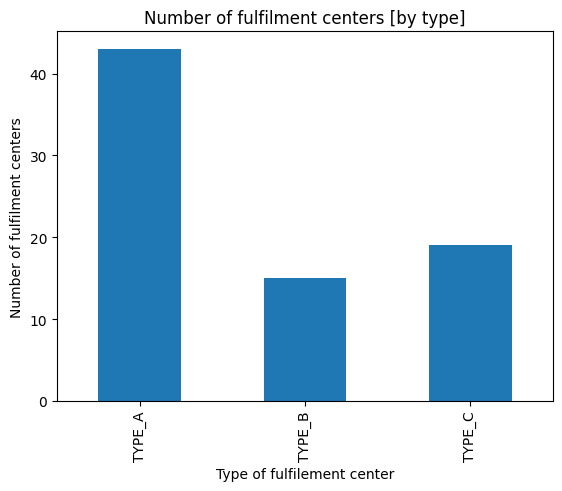

In [18]:
# whats the distribution of fulfilment centers wrt to their types | number of fulfilment centers for each type present in data
fulf_ctr.groupby(by='center_type').count()['center_id'].plot(kind='bar')
plt.xlabel('Type of fulfilement center')
plt.ylabel('Number of fulfilment centers')
plt.title('Number of fulfilment centers [by type]');

We see we have more type a fulfilment centers in our data

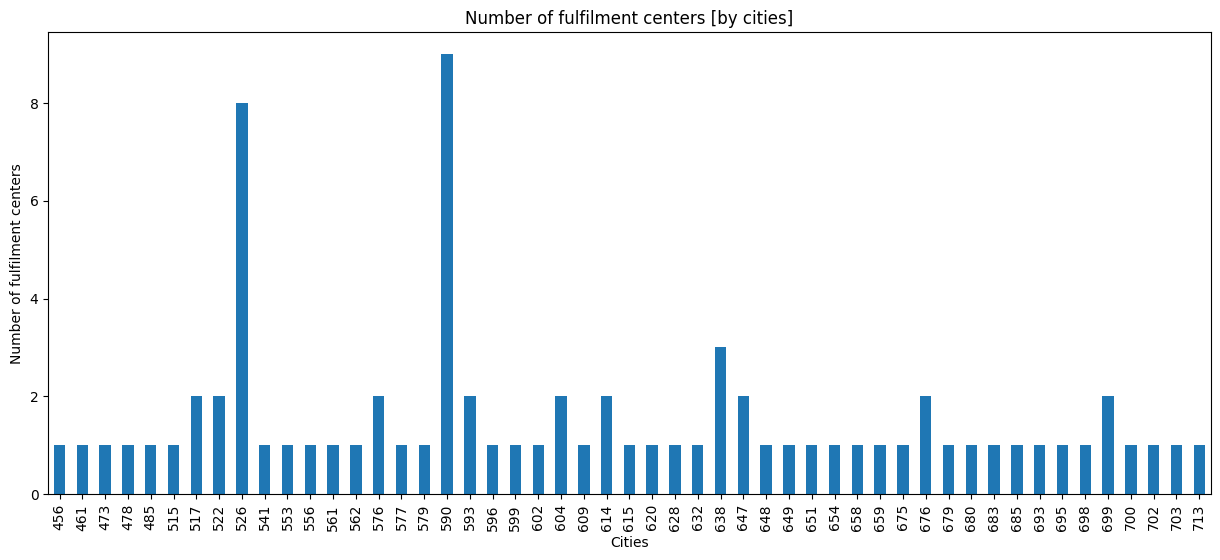

In [19]:
# fulfilment centers present [by city] | so where are these fulfilment centers really located
plt.figure(figsize=(15, 6))
fulf_ctr.groupby(by='city_code').count()['center_id'].plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of fulfilment centers')
plt.title('Number of fulfilment centers [by cities]');

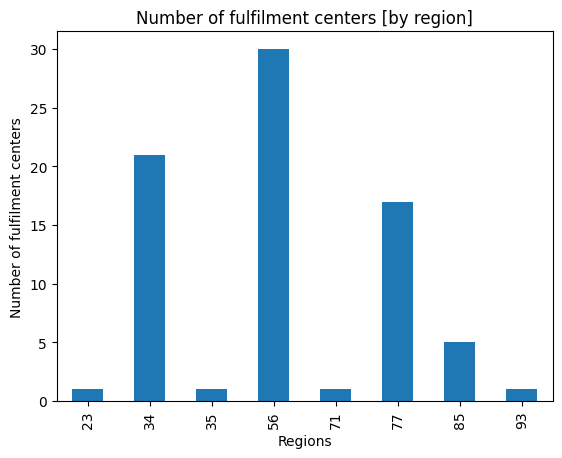

In [20]:
# can we visualize the number of fulfilment centers across each region
fulf_ctr.groupby(by='region_code').count()['center_id'].plot(kind='bar')
plt.xlabel('Regions')
plt.ylabel('Number of fulfilment centers')
plt.title('Number of fulfilment centers [by region]');

From the plot above we see that region 56 has so about 30 fulfilment centers, region 34 has about 20 and region 77 has about 18 fulfilment centers<br>
Can we look to see if these regions have the most orders for food on a weekly basis, and if in general any relationship exists between the number of orders on a weekly basis and a particular region?<br>
That being said lets go into the meat of the analysis

In [21]:
# can we see a stacked plot of the no of fulf centers by region and cities (2 plots) where for each bar it shows the amount of fulf types present in the region or city

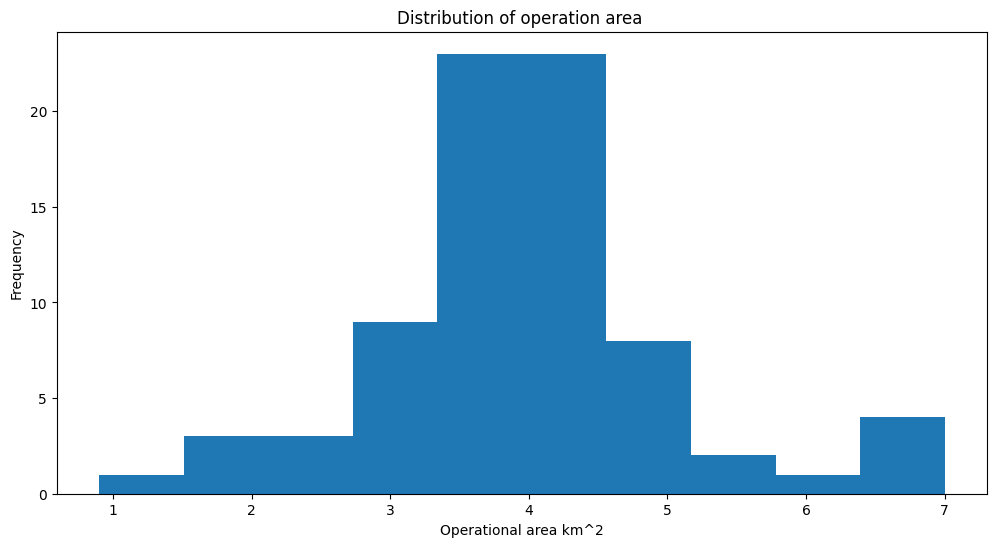

In [22]:
# whats the distribuition of operational area
plt.figure(figsize=(12, 6))
plt.hist(fulf_ctr.op_area)
plt.xlabel('Operational area km^2')
plt.ylabel('Frequency')
plt.title('Distribution of operation area ');

In [23]:
# join the weekly demand data with the fulf center and meal table on the center & meal id respectively
dem_weekly_fulf_ctr = pd.merge(demand_weekly, fulf_ctr, on='center_id', how='inner')

full_data = pd.merge(dem_weekly_fulf_ctr, meals, on='meal_id', how='inner')

In [24]:
inspect(full_data) # summary on full data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         270        647   
2                      0                  0         189        647   
3                      0                  0          54        647   
4                      0                  0          40        647   

   region_code center_type  op_area   category cuisine  
0           56      TYPE_C      2.0  Beverages    Thai  
1           56      TYPE_C      2.0  Beverages    Thai  
2           56      TYPE_C      2.0  Beverages    Thai  
3           56      TYPE_C      2.0  Beverages  Indian  
4           56      TYPE_C      2.0  Beverages  Indian

<Axes: xlabel='week'>

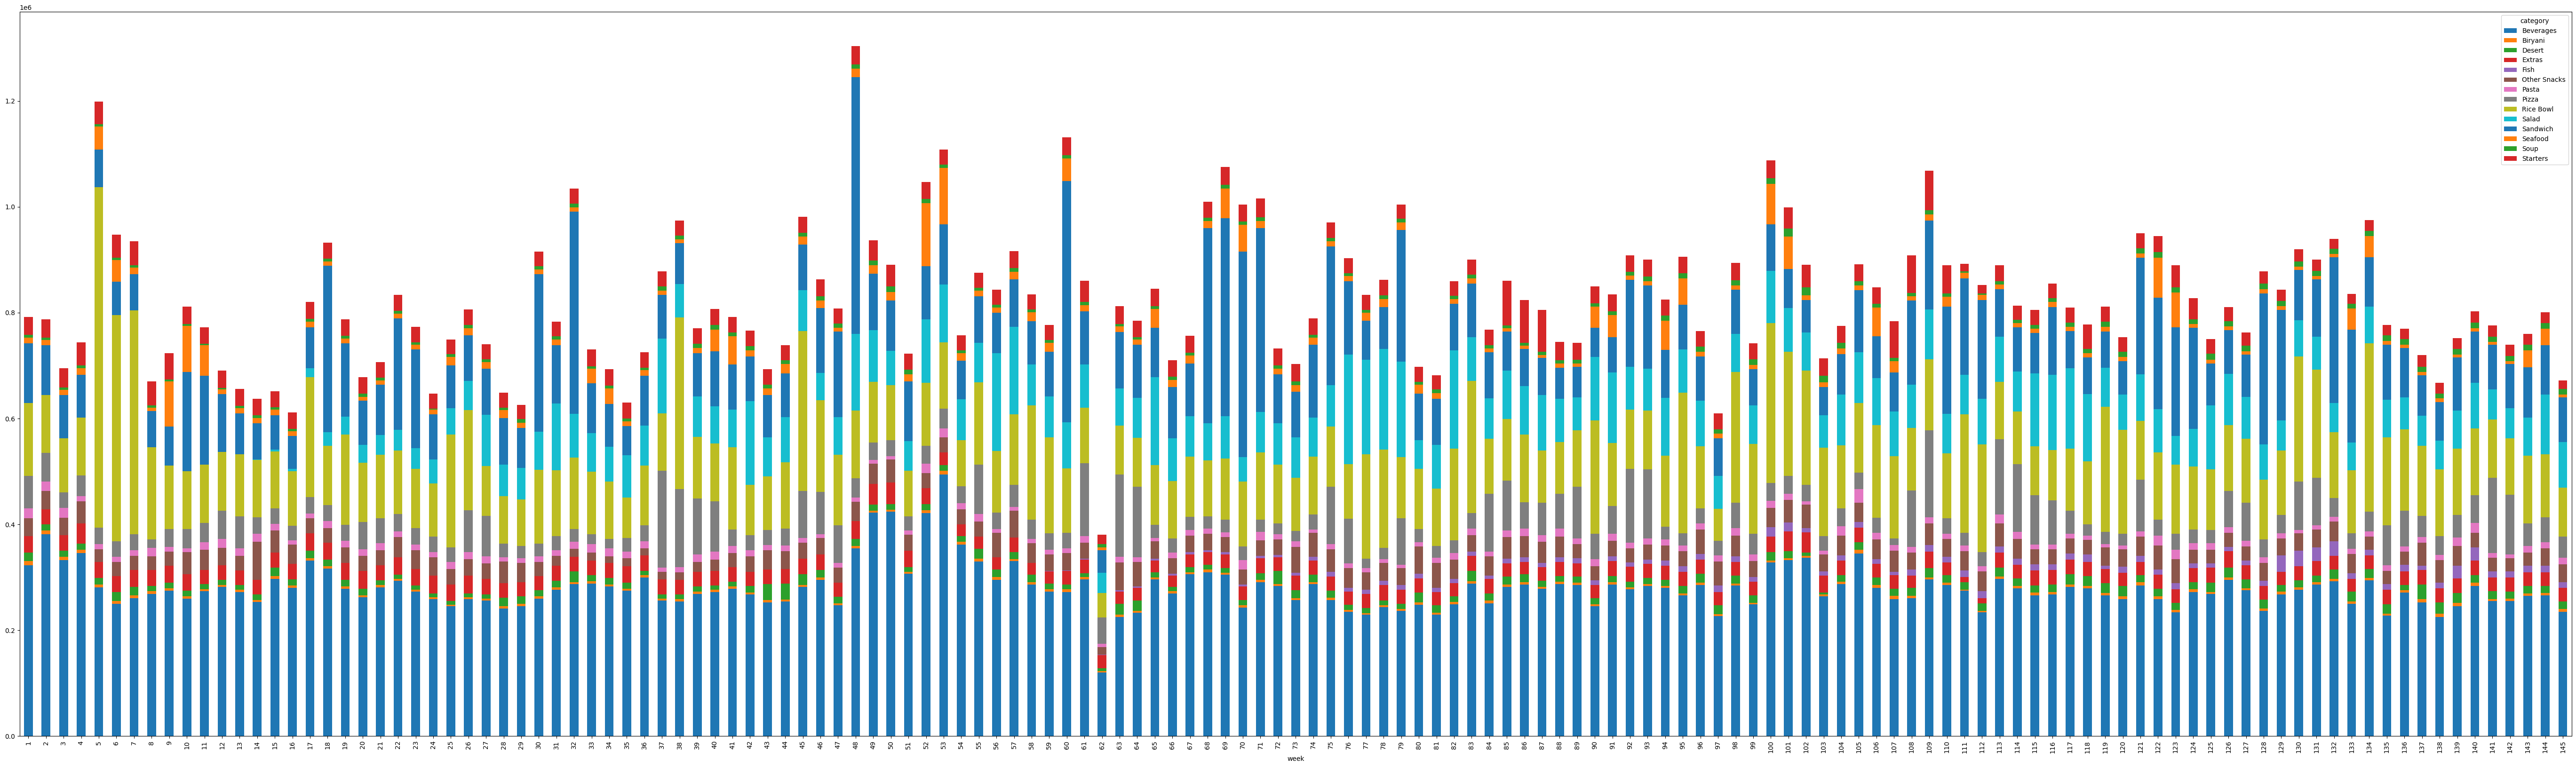

In [25]:
# how many weeks are in this data?
full_data.week.nunique()

# can we get a sense of the most popular category of food each week?

    # Group by 'week' and 'category', and compute the sum of 'num_orders'
result = full_data.groupby(['week', 'category']).agg({'num_orders': 'sum'}).reset_index()
    # Pivot the DataFrame to have 'category' values as columns
result_pivot = result.pivot(index='week', columns='category', values='num_orders')
    # visulize data
fig, ax = plt.subplots(figsize=(70, 20))
result_pivot.plot(kind='bar', stacked=True, ax=ax)


In [26]:
# how many weeks are in this data?
full_data.week.nunique()

# can we get a sense of the most demanded category of food each week across all fulfilment centers?

    # Group by 'week' and 'category', and compute the sum of 'num_orders'
result = full_data.groupby(['week', 'category']).agg({'num_orders': 'sum'}).reset_index()
fig = px.bar(result, x='week', y='num_orders', color='category',
             title='Total orders weekly (by Food category) across all fulfilment centers',
             labels={'num_orders': 'Total Number of orders', 'week': 'Weeks', 'category': 'Category of food'},
             barmode='stack')
# Set the size of the figure
fig.update_layout(height=1000, width=2000)

# Show plot
fig.show();

so lets try to forecast the amount of orders for each food category at each fulfilment center <br>
Does this mean we would have 14 (food category) tsa models * 3  (for each fulfilment center type) <br>
For that to be the case it means there is a significant relationship between the number of orders and the type of fulfilment center<br>
So lets try to find this relationship if one exists using either a regression model 
We will try to see if theres a relationship that exists between the following features:
    <ul>region the food was ordered in, </ul>
    <ul>the type of fulfilment center that recieved the order, </ul>
    <ul>the city the food was ordered in (might remove if it's colinear with region) </ul>
    <ul>the fulfilment center </ul>
    <ul>the checkout and base prices</ul>
    <ul>if the meal was promoted </ul>
and the num of orders that were recieved for each week

<br>
<br>
if theres no relationship, we might just build 77 tsa models to forecast the number of orders to expect for the coming week but this wouldnt be nearly as useful because; what food would be mostly ordered, in other words this wouldnt help solve our business problem<br>
So we instead we might have to build 14 tsa models for each of the 77 fulfilment centers to forecast the number of orders to expect for each food category the following week in each of these fulfilment centers

In [27]:
# Lets visualize the distribution of meals that was ordered over the course of 146 weeks from each fulfilment center

result = full_data.groupby(['center_type', 'category']).agg({'num_orders': 'sum'}).reset_index()

fig = px.bar(result, x='center_type', y='num_orders', color='category',
             title='All time number of orders recieved by each fulfilment center type [by food category]',
             labels={'num_orders': 'Total Number of orders', 'center_type': 'Center Type', 'category': 'Category of food'},
             barmode='stack')

# Set the size of the figure
fig.update_layout(height=1000, width=2000)

# Show plot
fig.show();

The plot above is prefered because we can't easily visulize each fulfilment center by the meal that was ordered each week due to the nature of our data<br>
Especially because:<br>
1. We have 77 meals that encoded with their ids and no names (so this automatically makes it hard to code cause they are numbers)
2. We have a similar thing for the centers<br>

The plot above also helps us to, across all time, see the distribution of orders in the fulfilment center grouped by their types


In [29]:
# Looking for relationships

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = full_data.drop(columns=['week', 'id', 'num_orders'])
y = full_data['num_orders']
# inspect(X
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_cols = list(X.drop(columns=['base_price', 'checkout_price', 'op_area']).columns) # categorical feat
num_cols = list(X[['base_price', 'checkout_price', 'op_area']].columns) # numerical feat


cat_process = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown = 'ignore'))
])

num_process = Pipeline([
    ('scaler', StandardScaler())
])

preprocess = ColumnTransformer([
  ('cat_cols', cat_process, cat_cols),
  ('num_cols', num_process, num_cols)
])

pipeline = Pipeline([
  ('preprocess', preprocess),
  ('lr', LinearRegression())
])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

pipeline.score(x_test, y_test)

mean_squared_error(y_pred, y_test)

78286.48055871051

In [30]:
# distribution of total number of orders (for every meal category) each fullfilment center saw each week

result =  full_data.groupby(by=['center_id', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize
fig = px.box(result, x='center_id', y='num_orders', 
             title='Distribution of total demand weekly[every food] for each Fulf Center',
             labels={'num_orders':'Total Demand', 'center_id': 'Fulfilment Center'}
            )
    # Set the size of the figure
fig.update_layout(height=1000, width=2000)

fig.show();

Trend Plots <br>
Recall our objective is to forecast the demand for food by food category in each fulfilment center, lets visualize some trend plots of demand for food by category for at least two centers across all time

In [31]:
full_data.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         270        647   
2                      0                  0         189        647   
3                      0                  0          54        647   
4                      0                  0          40        647   

   region_code center_type  op_area   category cuisine  
0           56      TYPE_C      2.0  Beverages    Thai  
1           56      TYPE_C      2.0  Beverages    Thai  
2           56      TYPE_C      2.0  Beverages    Thai  
3           56      TYPE_C      2.0  Beverages  Indian  
4           56      TYPE_C      2.0  Beverages  Indian

In [32]:
# TREND PLOTS!!!! TREND PLOTS!!!! TREND PLOTS!!!! - what we are really working with

# We want to visualize the trend of the total number of orders for each food category on a weekly basis for one center
# We start by visualizing the activity in one fulfilment center

ctr_10 = full_data[full_data.center_id == 10]
result = ctr_10.groupby(['category', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize

fig = px.line(result, x='week', y='num_orders', color='category',
              title='Trend Plot of No of Orders for each Food Category (center_id=10)',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=1000, width=2000)

# Show the plot
fig.show();


So we can see from the above plot the trends for each food category across 146 weeks for just one center, <br>
now we have to do this for the remaining 76 centers <br>
Which would be followed by an analyis to prepare the data for the tsa models (either AR, MA, ARMA, ARIMA, OR GARCH) based on which should be used <br>
Now remember for each food category we have to train a tsa model to forecast the number of orders that would come in the subsequent week in the fulfilment center <br>
So in a sense I have to look at 77 * 14 trendlines and by look at there are three things we consider when preparing the data for a tsa model <br>
- stationarity
- acf (autocorrelative function) that helps us in knowing direct and inderect correlation and which lags would be useful for the MA model we would use
- and the PACF (partial autocorrelation function) that helps us in knowing direct correlation and which lags would be useful for our AR model or ARMA or ARIMA model

<br>
So all these plots have to be looked at 77*14 (1048) times...
<br>
I shall be thinking of ways to truncate this process in half or something 
<br>
<br> ** Psstt...I just had an Idea ** 
<br>what if we picked one center (maybe the average fulfilment center) from each type and build a model that forecasts each food demand for all three.
<br>
That drastically drops the amount of tsa models to 3 * 14 (just 42!)
<br>
Another idea is to aggregate the total demand each week for each center by summing the orders for each food category. We can easilfy visualize this and if we choose to work with this time series
<br>
our number of time series models will be 77 instead

In [33]:
# Lets visualize one more center

ctr_11 = full_data[full_data.center_id == 11]
result = ctr_11.groupby(['category', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize

fig = px.line(result, x='week', y='num_orders', color='category',
              title='Trend Plot of No of Orders for each Food Category (center_id=11)',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=1000, width=2000)

# Show the plot
fig.show();


In [34]:
# and one more for a type C centers
ctr_124 = full_data[full_data.center_id == 124]
result = ctr_124.groupby(['category', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize

fig = px.line(result, x='week', y='num_orders', color='category',
              title='Trend Plot of No of Orders for each Food Category (center_id=124)',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=1000, width=2000)

# Show the plot
fig.show();

In [35]:
# total demand each week in each center

result = full_data.groupby(by=['center_id', 'week']).agg({'num_orders':'sum'}).reset_index()

    # visualize
fig = px.line(result, x='week', y='num_orders', color='center_id',
              title='Trend Plot for total demand weekly[every food] for each Fulf Center',
              labels={'week': 'Week', 'num_orders': 'Number of Orders'})

    # Set the size of the figure
fig.update_layout(height=1000, width=2000)

    # Show the plot
fig.show();


I toggle off about 71 centers to make the plot less cluttered<br>
But the above plot shows a trend of the total orders recieved by each fulf center each week <br>
We can model this information for a more general forecast of total orders that would come in the following week<br>
We would make 77 tsa models taking this solution approach

### Lets conduct stationarity tests and visualize results


<br>
For idea 1: Lets make a grid plot that is 77 x 14 where each box shows whether the food category ts plot for a fulf center is stationary or not<br>
We need to do this to get a sense of which plots are stationary or not and transform them to be stationary so they can be useful for our ARMA models
<br>

In [38]:
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(series):
    '''
    Function perform stationarity test on a time series
    p-value < .05 stationary
    p-value >= 0.05 not stationary
    '''
    result = adfuller(series)
    # print('ADF Statistic: %f' % result[0])
    # print('p-value: %f' % result[1])
    return np.round(result[1], 3)

# perform_adf_test(result.loc[(10, 'Rice Bowl')].squeeze())

In [39]:
# number of orders for each food category for each center on a weekly basis
result = full_data.groupby(['center_id', 'category', 'week']).agg({'num_orders':'sum'})

# get list of both centers & food categories
food_categories = list(full_data.category.unique())

center_ids = sorted(list(full_data.center_id.unique()))

# instantiate df
stationarity_1_df  = pd.DataFrame(index=center_ids, columns=food_categories, dtype='float')

# perform stationarity test for food category ts for each center
for center in center_ids:
    
    # get food categories present in the center
    center_food_categories = result.loc[(center)].reset_index().category.unique()
    
    for food_category in food_categories:
        
        # check if food category was sold in that center
        if food_category in center_food_categories:
            
            # slice into data to get a timeseries
            resulting_ts = result.loc[(center, food_category)]
            # print(center, food_category) # DEBUG
        
            # validate ts first to meet alf test criteria and usefulness
            if result.loc[(center, food_category)].size > 30: # number of weeks present should be greater than 30
                p_val = perform_adf_test(resulting_ts.squeeze())
                
                # store result
                stationarity_1_df.loc[center, food_category] = p_val

inspect(stationarity_1_df)

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 10 to 186
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Beverages     77 non-null     float64
 1   Rice Bowl     77 non-null     float64
 2   Starters      77 non-null     float64
 3   Pasta         77 non-null     float64
 4   Sandwich      77 non-null     float64
 5   Biryani       76 non-null     float64
 6   Extras        36 non-null     float64
 7   Pizza         77 non-null     float64
 8   Seafood       76 non-null     float64
 9   Other Snacks  77 non-null     float64
 10  Desert        77 non-null     float64
 11  Soup          33 non-null     float64
 12  Salad         77 non-null     float64
 13  Fish          61 non-null     float64
dtypes: float64(14)
memory usage: 11.1 KB
None



Beverages  Rice Bowl  Starters  Pasta  Sandwich  Biryani  Extras  Pizza  \
10      0.001        0.0     0.000    0.0       0.0      0.0   0.390    0.0   
11      0.468        0.0     0.001    0.0       0.0      0.0   0.211    0.0   
13      0.000        0.0     0.000    0.0       0.0      0.0   0.540    0.0   
14      0.000        0.0     0.003    0.0       0.0      0.0   0.435    0.0   
17      0.017        0.0     0.004    0.0       0.0      0.0   0.012    0.0   

    Seafood  Other Snacks  Desert   Soup  Salad   Fish  
10      0.0          0.00    0.00  0.140    0.0  0.000  
11      0.0          0.02    0.00  0.435    0.0  0.000  
13      0.0          0.00    0.00  0.039    0.0  0.000  
14      0.0          0.00    0.04  0.769    0.0  0.000  
17      0.0          0.00    0.00  0.001    0.0  0.118

As seen in the information on stationarity for our time series above, we might just select to build time series models for food categories that have a test score on at least 76 of the centers<br>
We will be dropping the other food categories that didnt sell as much over the time period<br>
We will be preprocessing food category time series that did not pass the test (so are non-stationary) so they become stationary <br>
Then we will proceed to train the ts models

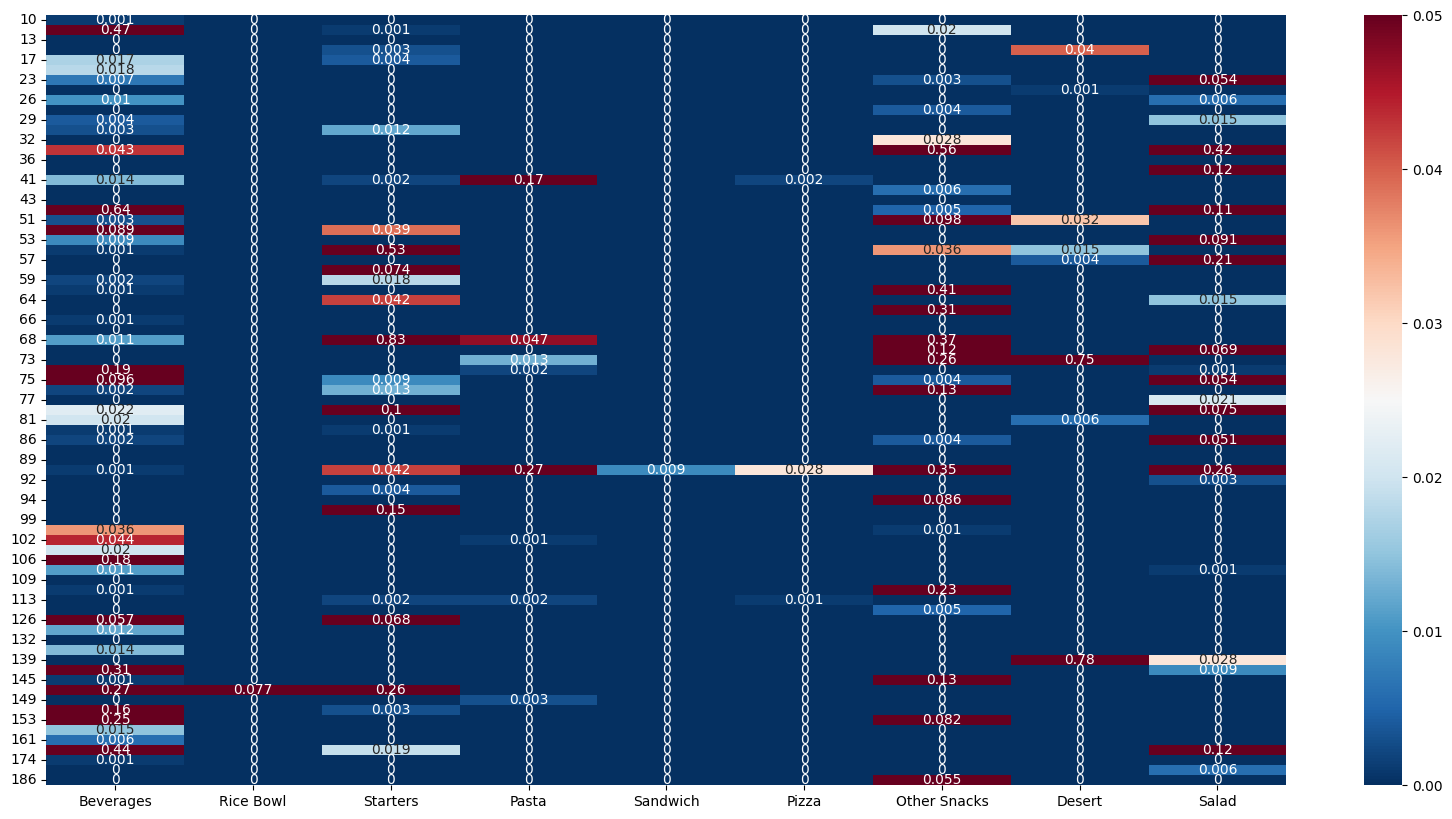

In [40]:
# Lets visualize the stationarity df to know which timeseries passed the test (p-val < 0.05)
stationarity_1_df.dropna(axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(stationarity_1_df.dropna(axis=1), vmin=0, vmax=0.05, cmap= 'RdBu_r', annot=True);

Looking the heat map above; I want to just build forecast models for just rice bowl, sandwich and pizza across all the centers because we are pressed for time...<br>
lets just build for those 3 categories because they pass the stationarity test and there wouldn't be any need to preprocess (make stationary) and we are pressed for time <br>
That being said, total models will now be 77 * 3 (231 tsa arma/garch/arima) models

#### TIME SERIES MODEL BUILDING

We have to make pacf and acf plots for all time series data we will be forecasting<br> 
That number is equals 2 * 231 models

In [41]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler



In [42]:
# number of orders for each food category for each center on a weekly basis
result = full_data.groupby(['center_id', 'category', 'week']).agg({'num_orders':'sum'})
result

num_orders
center_id category  week            
10        Beverages 1           9116
                    2           8830
                    3           9421
                    4           9321
                    5           7523
...                              ...
186       Starters  141          233
                    142          178
                    143          149
                    144          121
                    145           94

[133003 rows x 1 columns]

In [46]:
categories = list(stationarity_1_df.dropna(axis=1).columns)
main = result.loc[(slice(None), categories), :]
main

num_orders
center_id category  week            
10        Beverages 1           9116
                    2           8830
                    3           9421
                    4           9321
                    5           7523
...                              ...
186       Salad     141          418
                    142          380
                    143          731
                    144          729
                    145          485

[98310 rows x 1 columns]

In [47]:
main.loc[(10, 'Starters')]

C:\Users\mahad\AppData\Local\Temp\ipykernel_60360\1955588630.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



num_orders
week            
1           1095
2           1001
3           1431
4           1190
5           1889
...          ...
141          594
142          730
143          541
144          541
145          418

[145 rows x 1 columns]

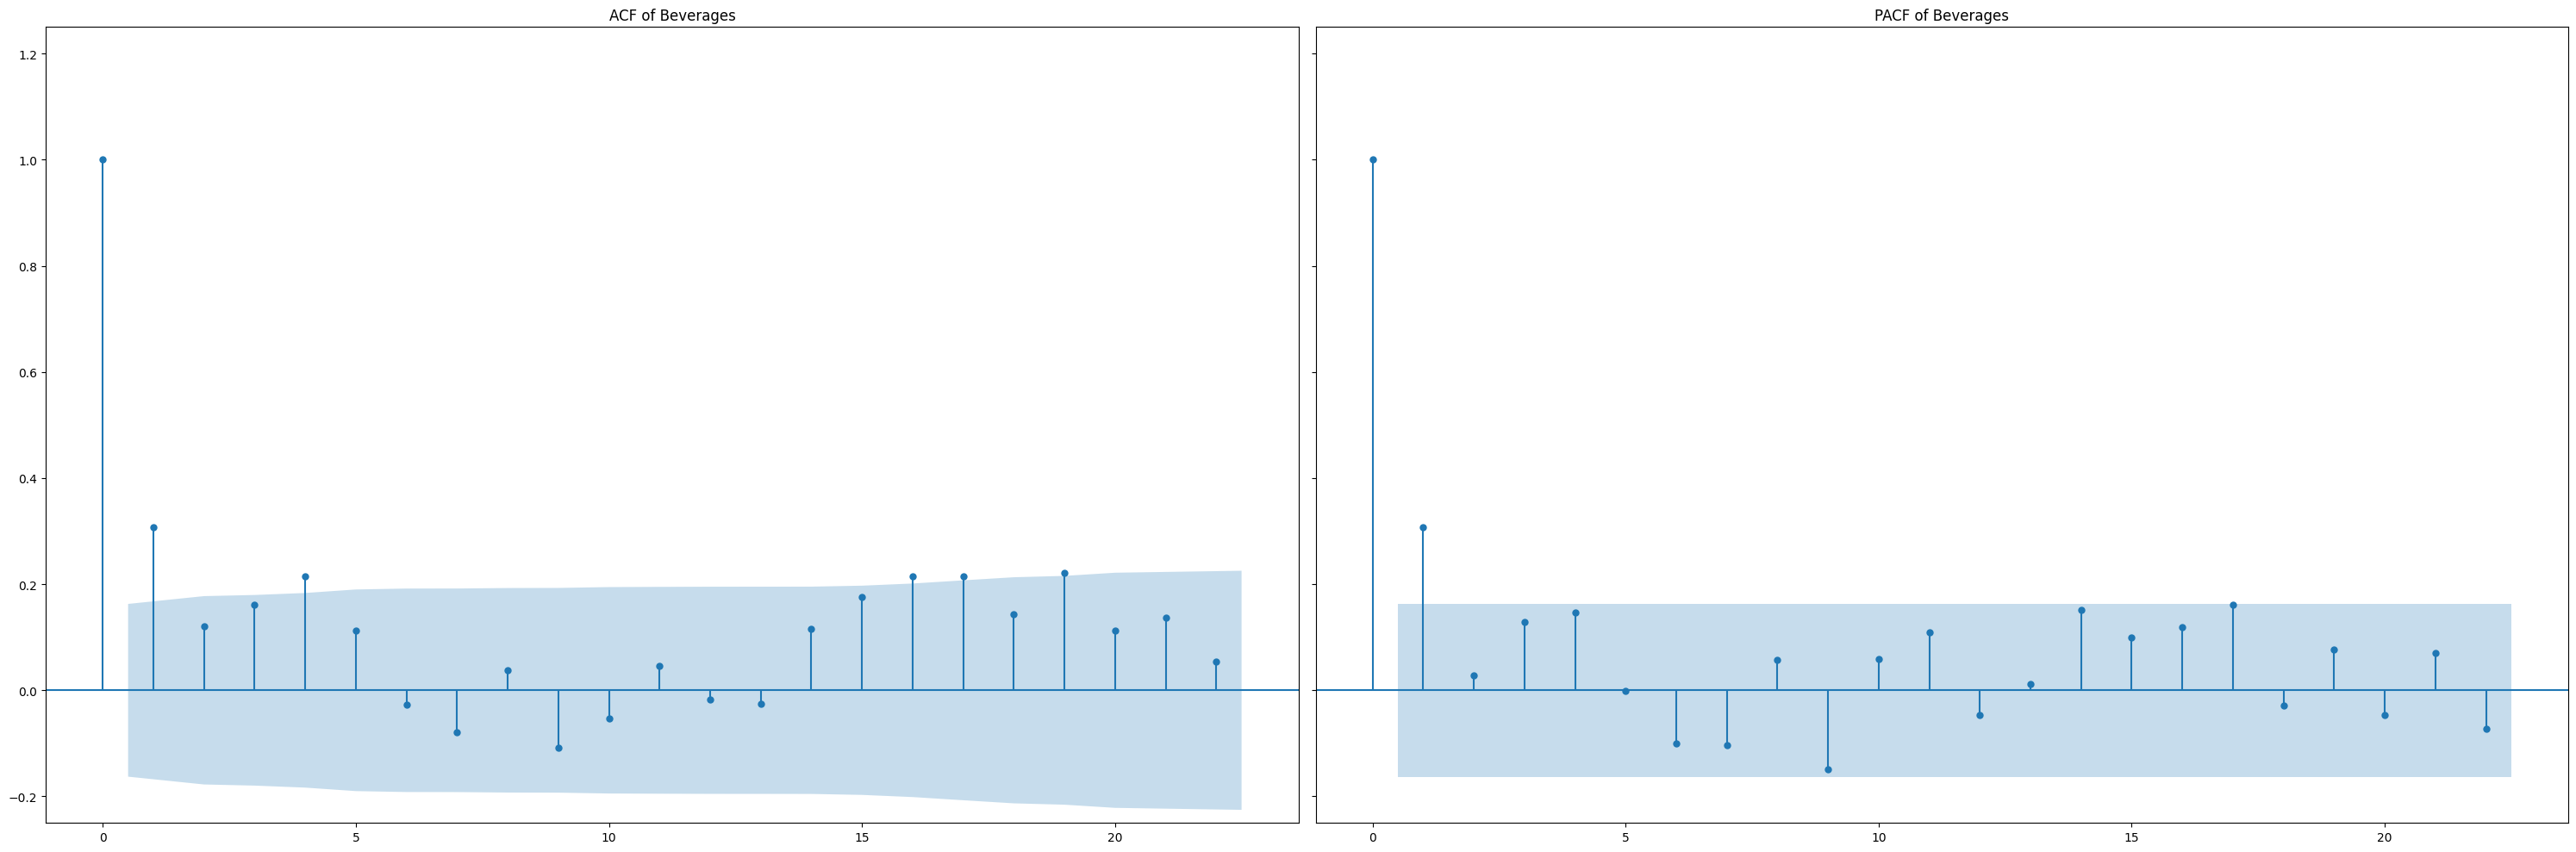

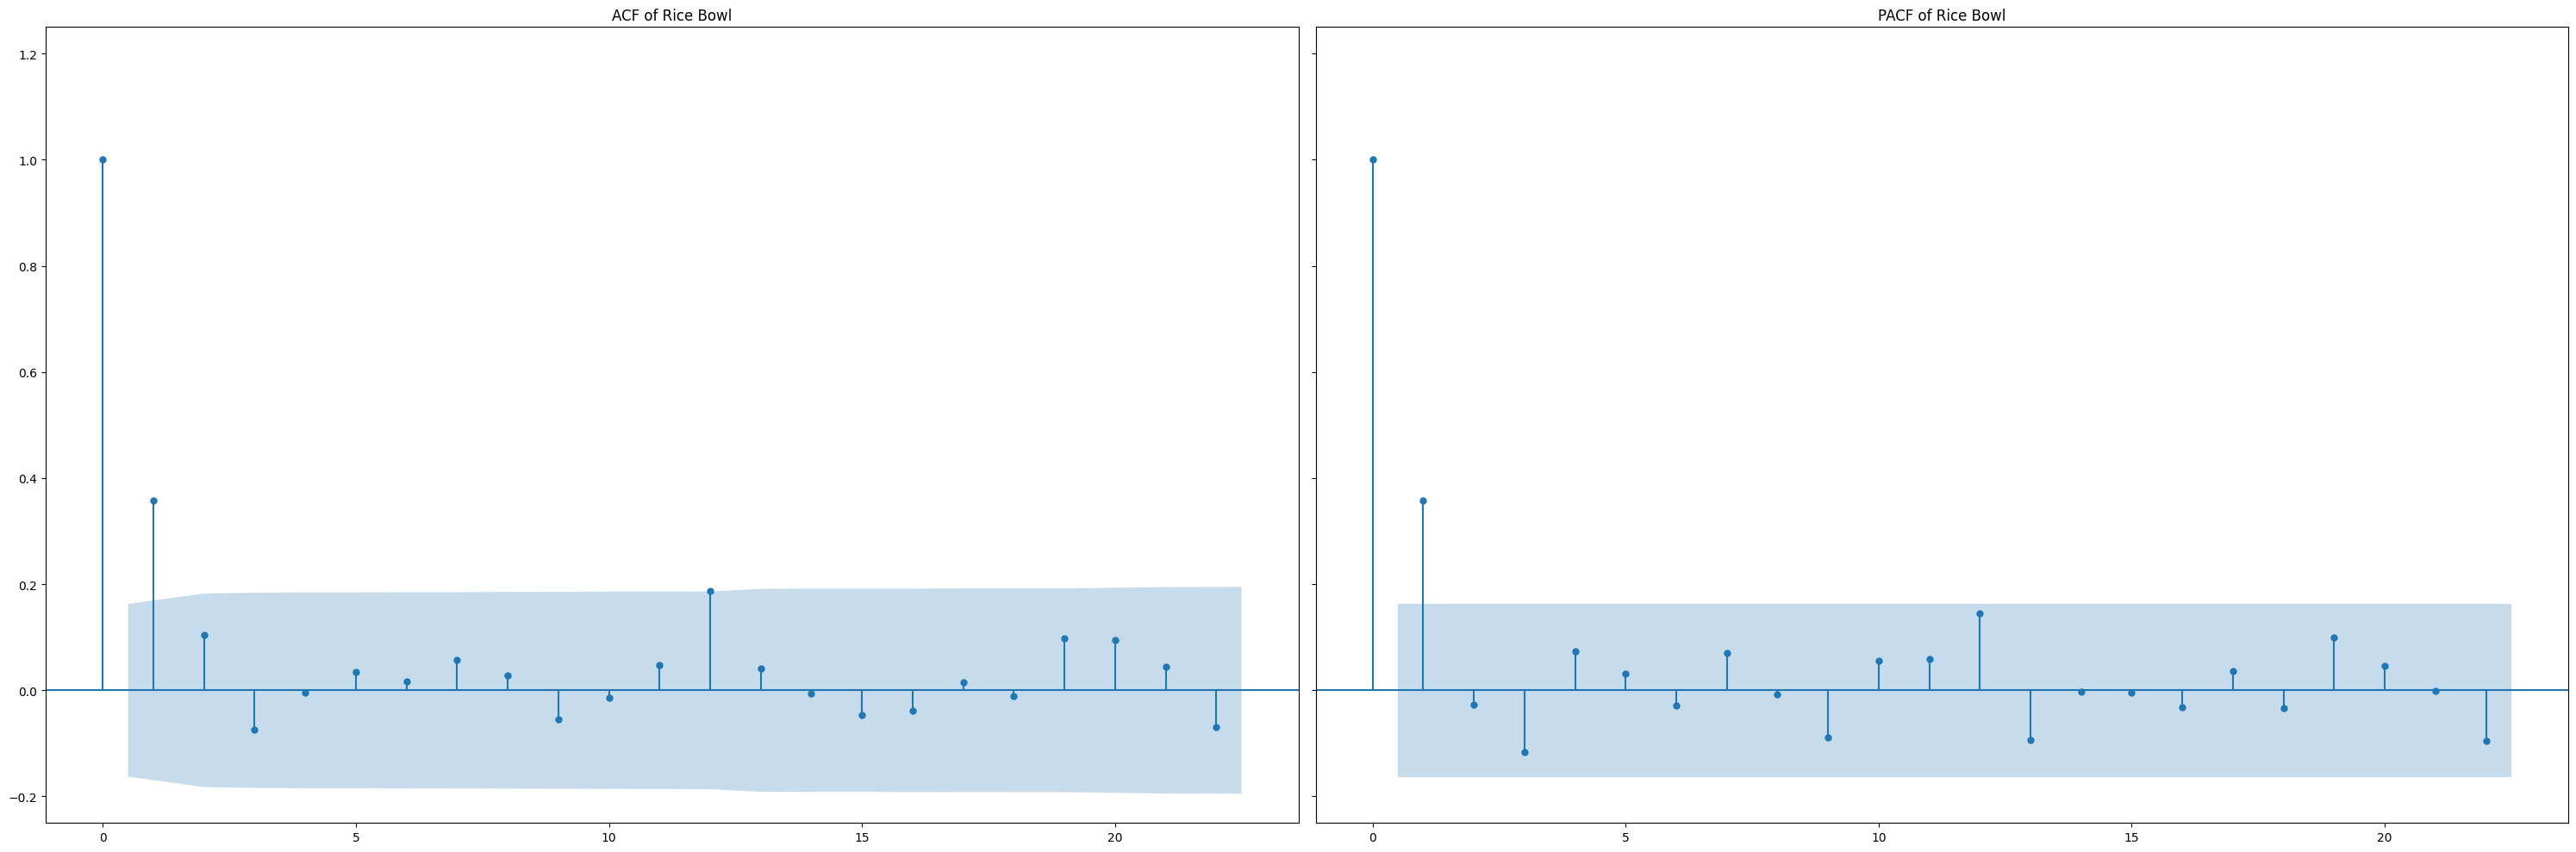

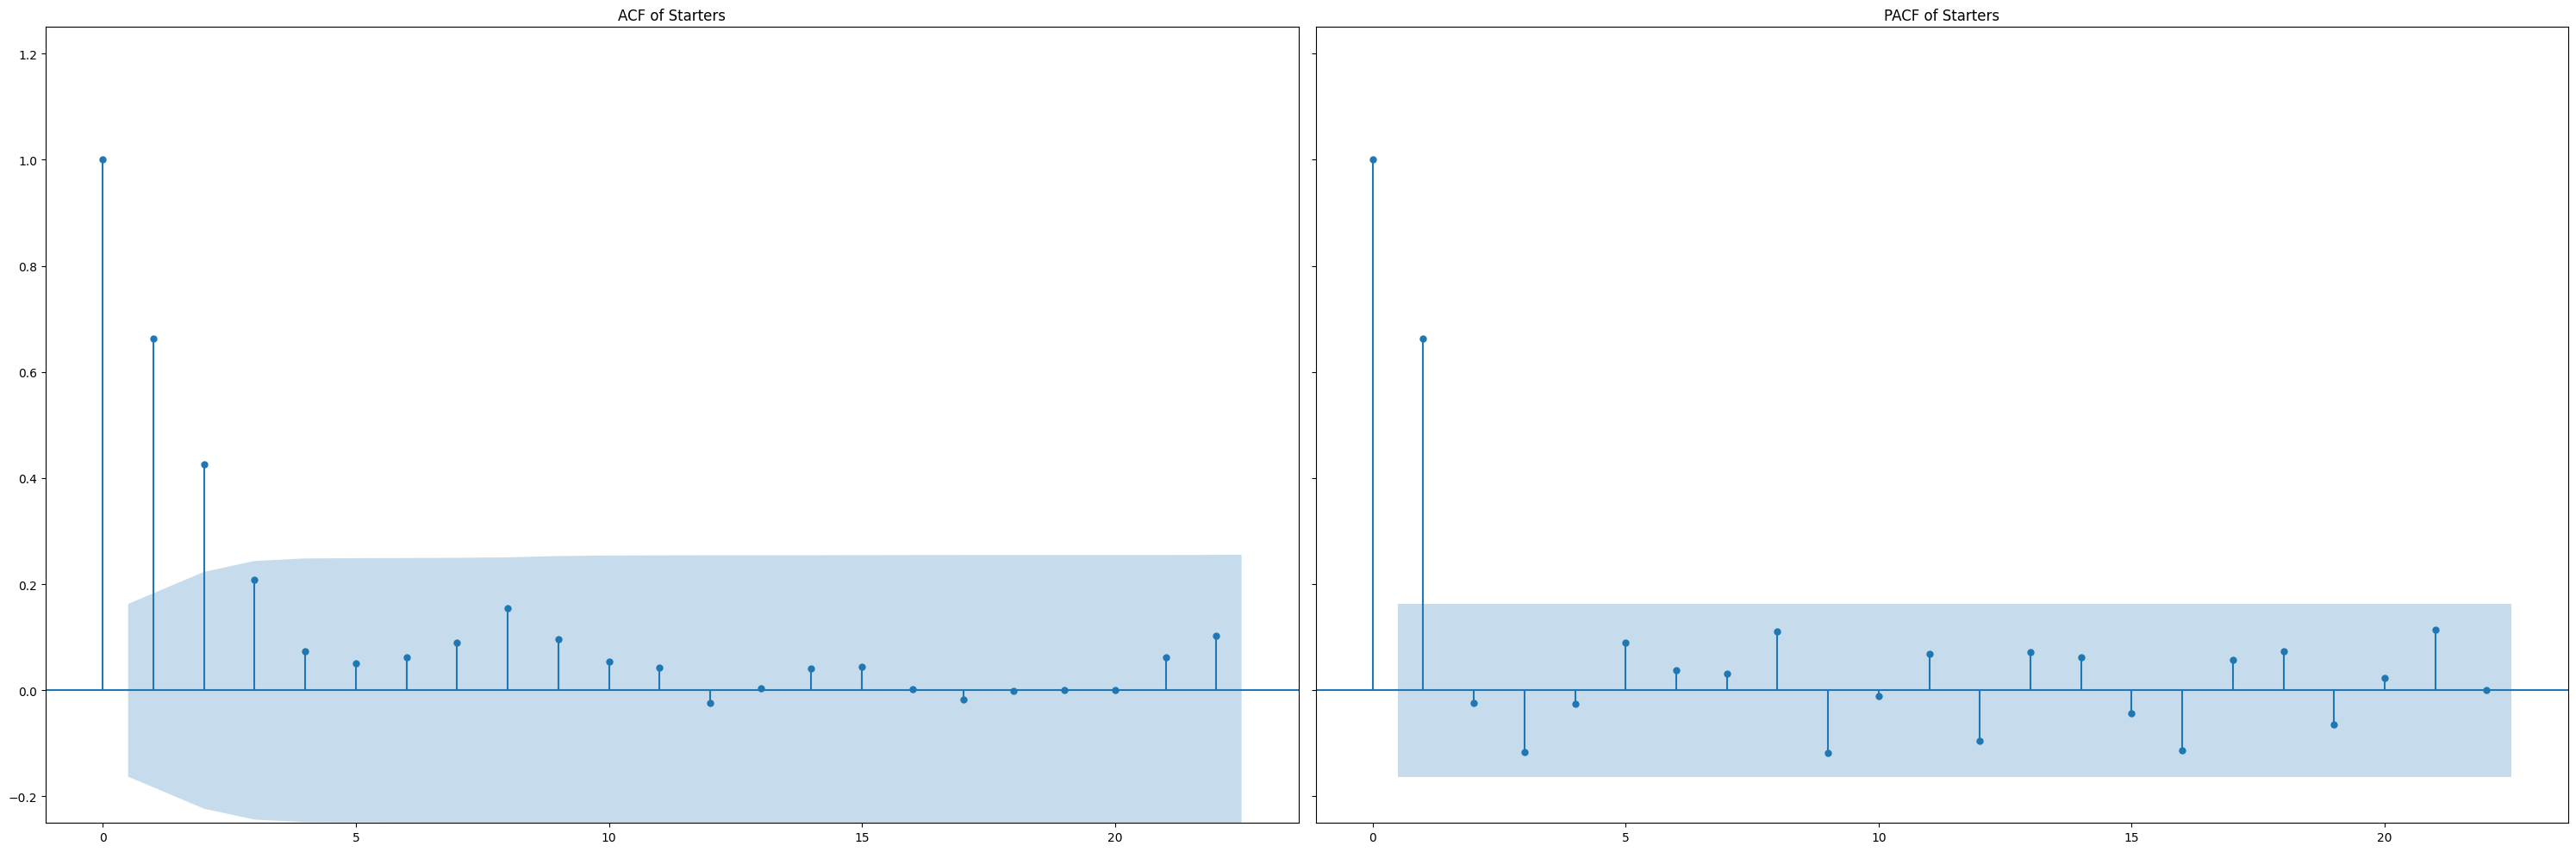

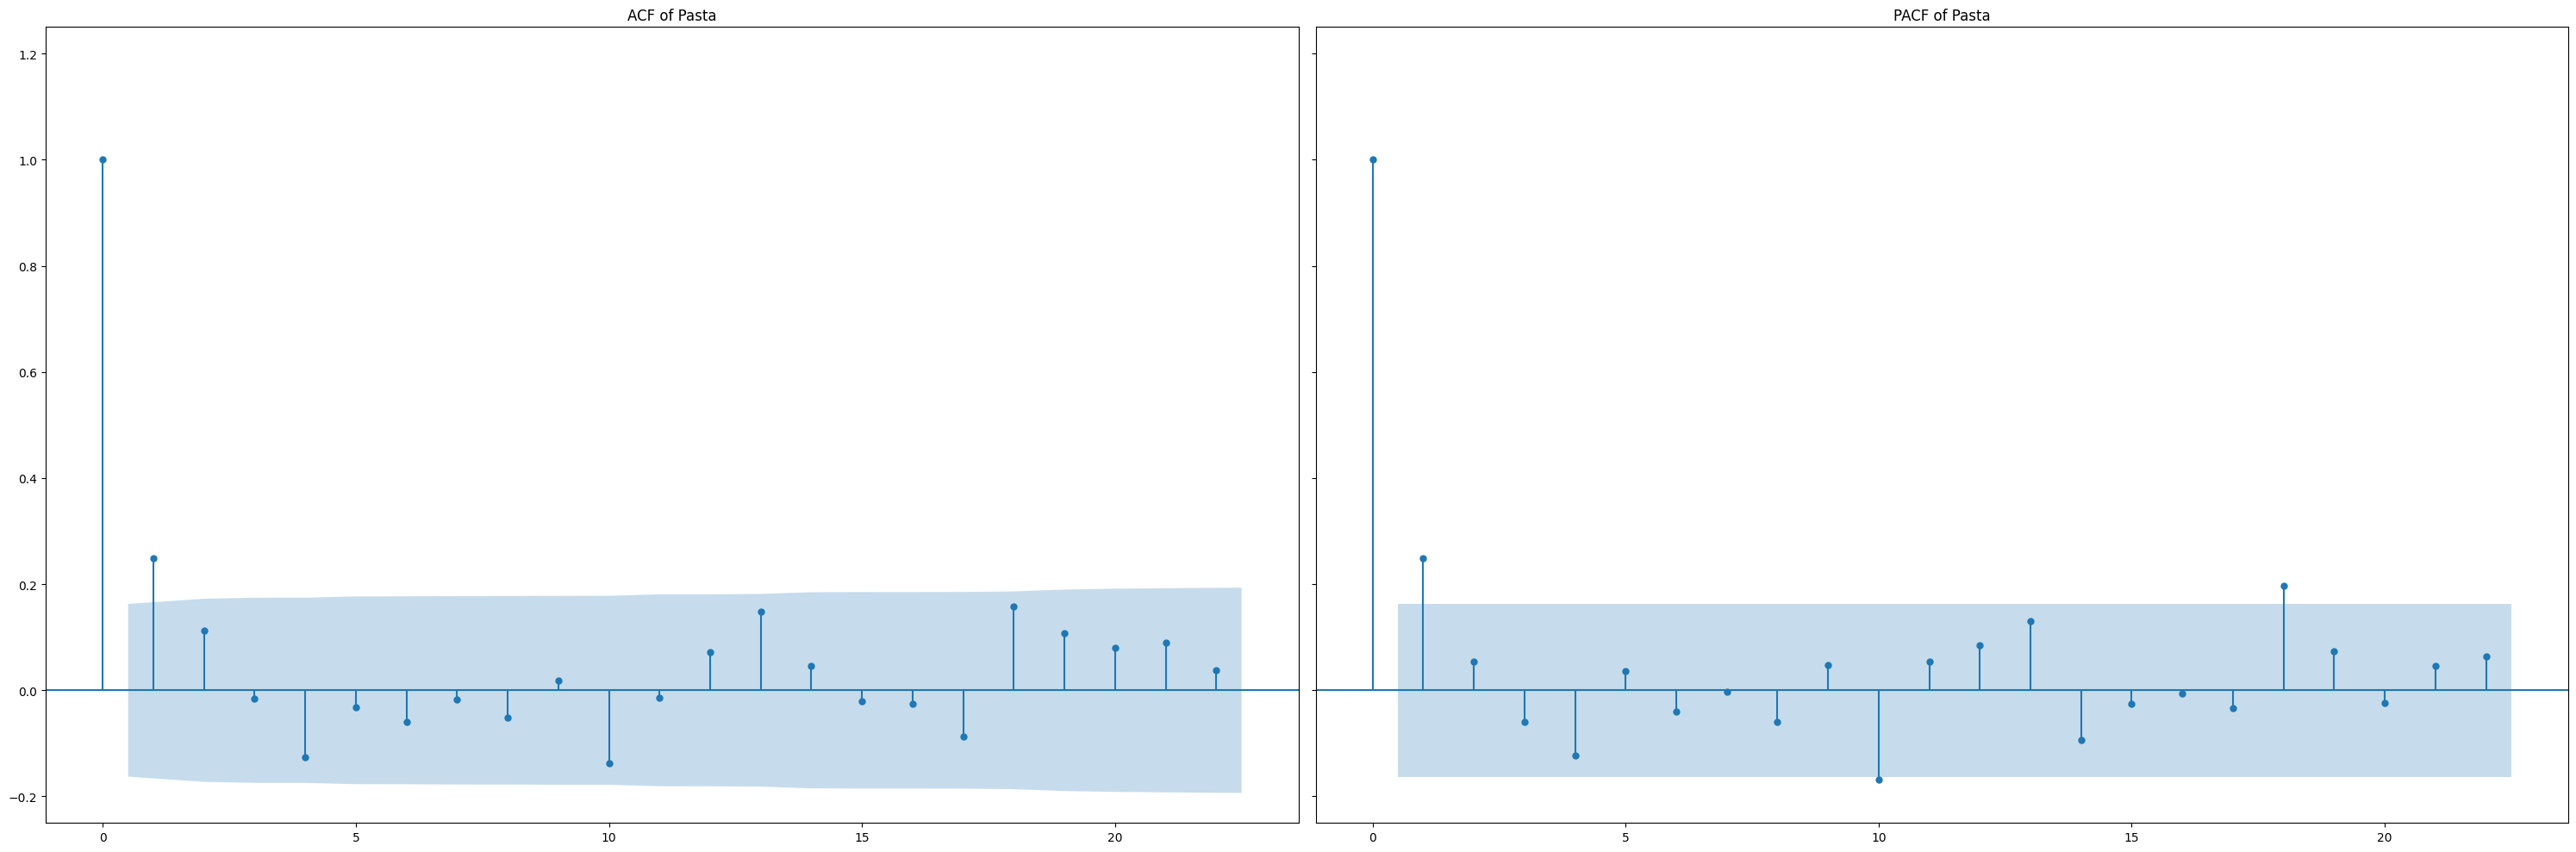

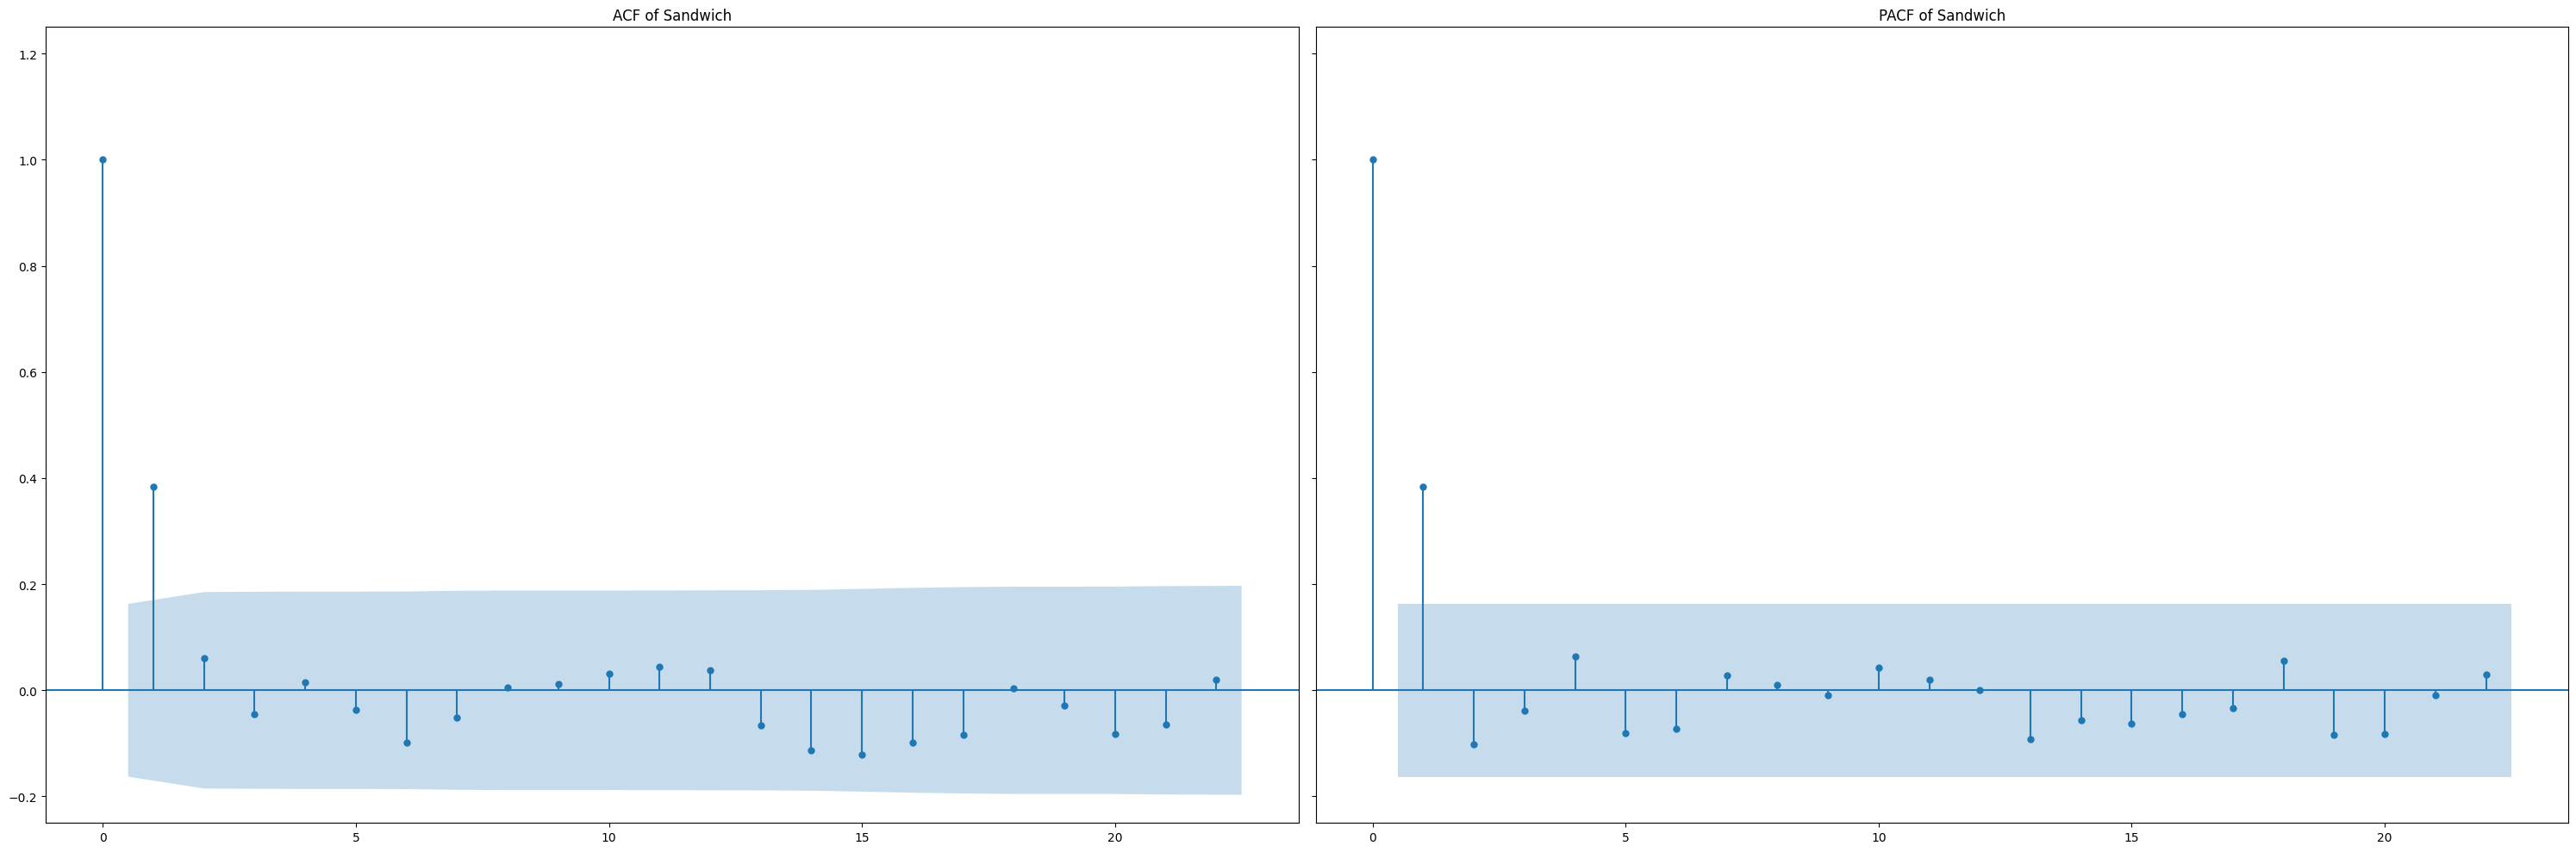

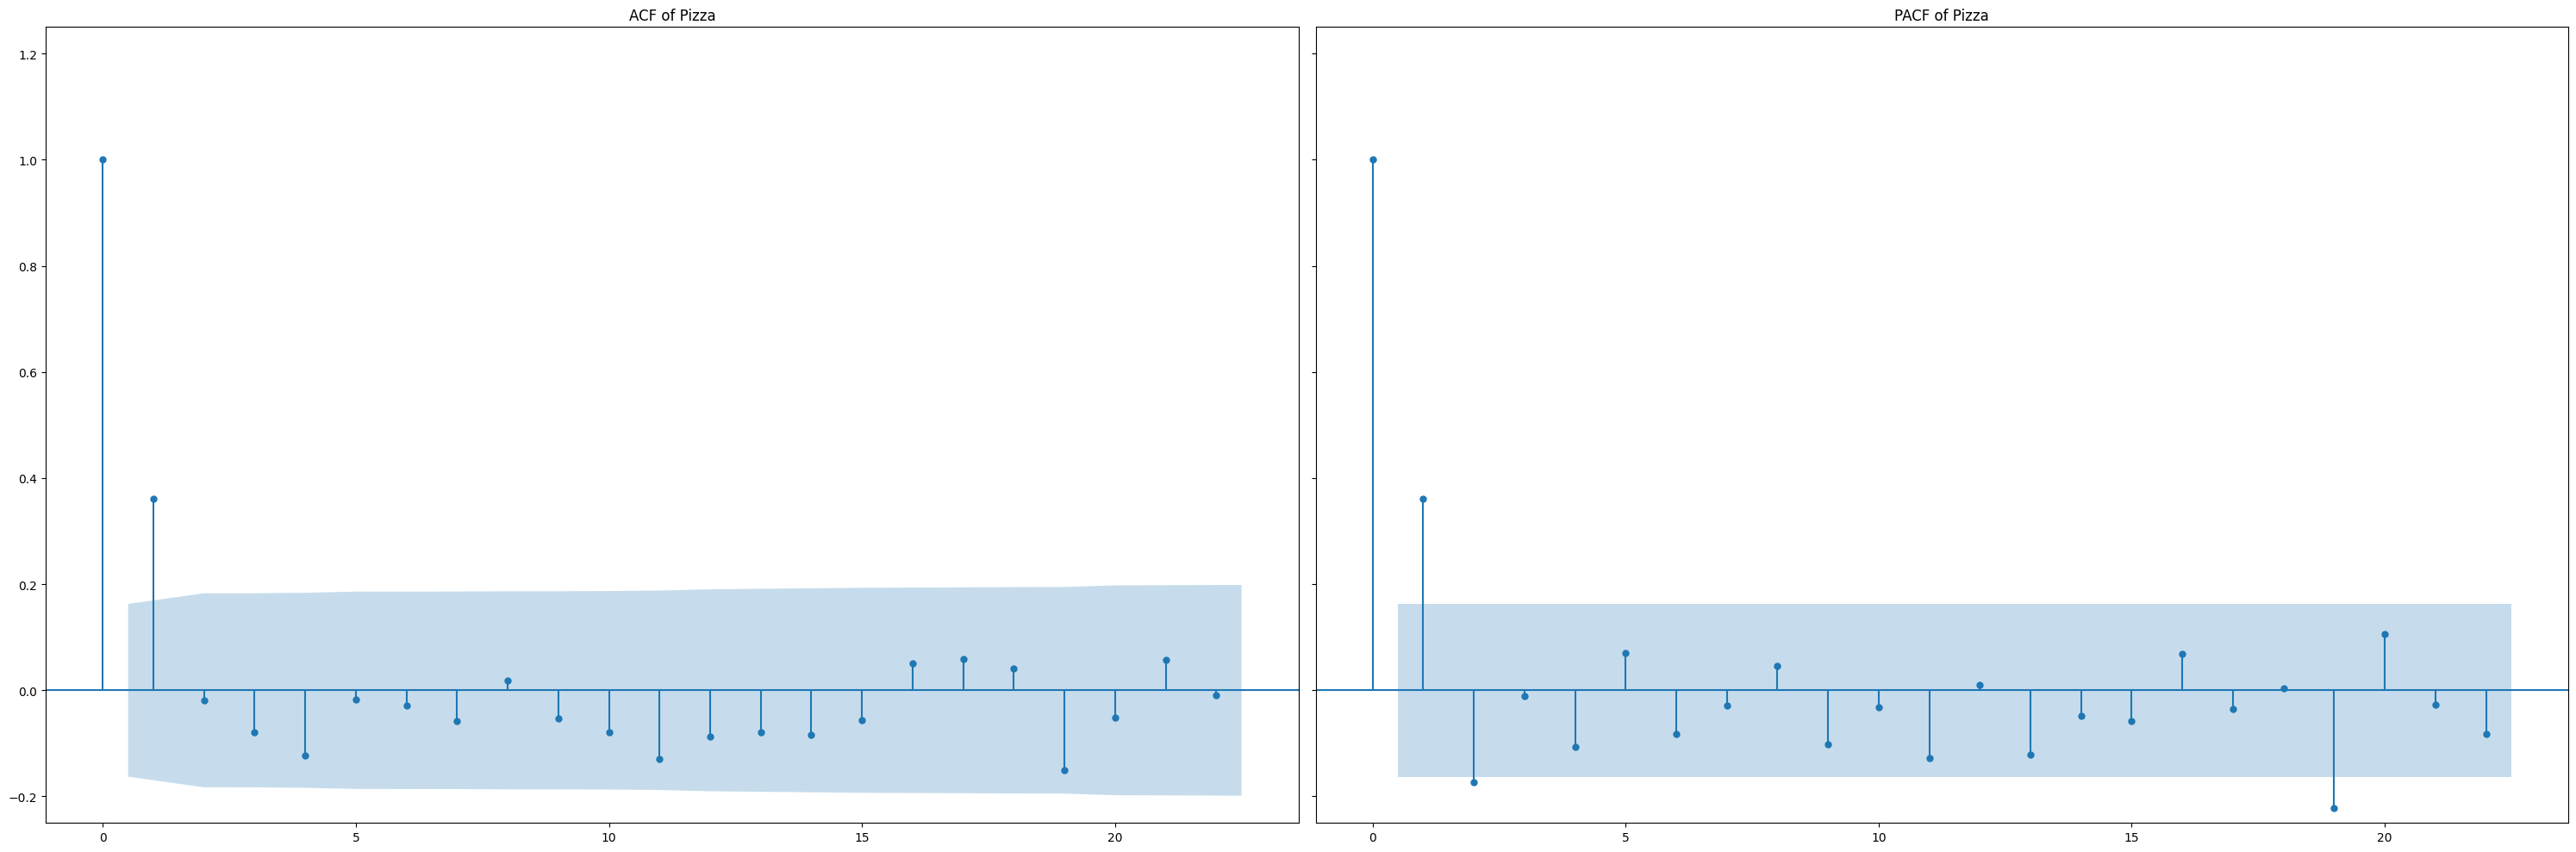

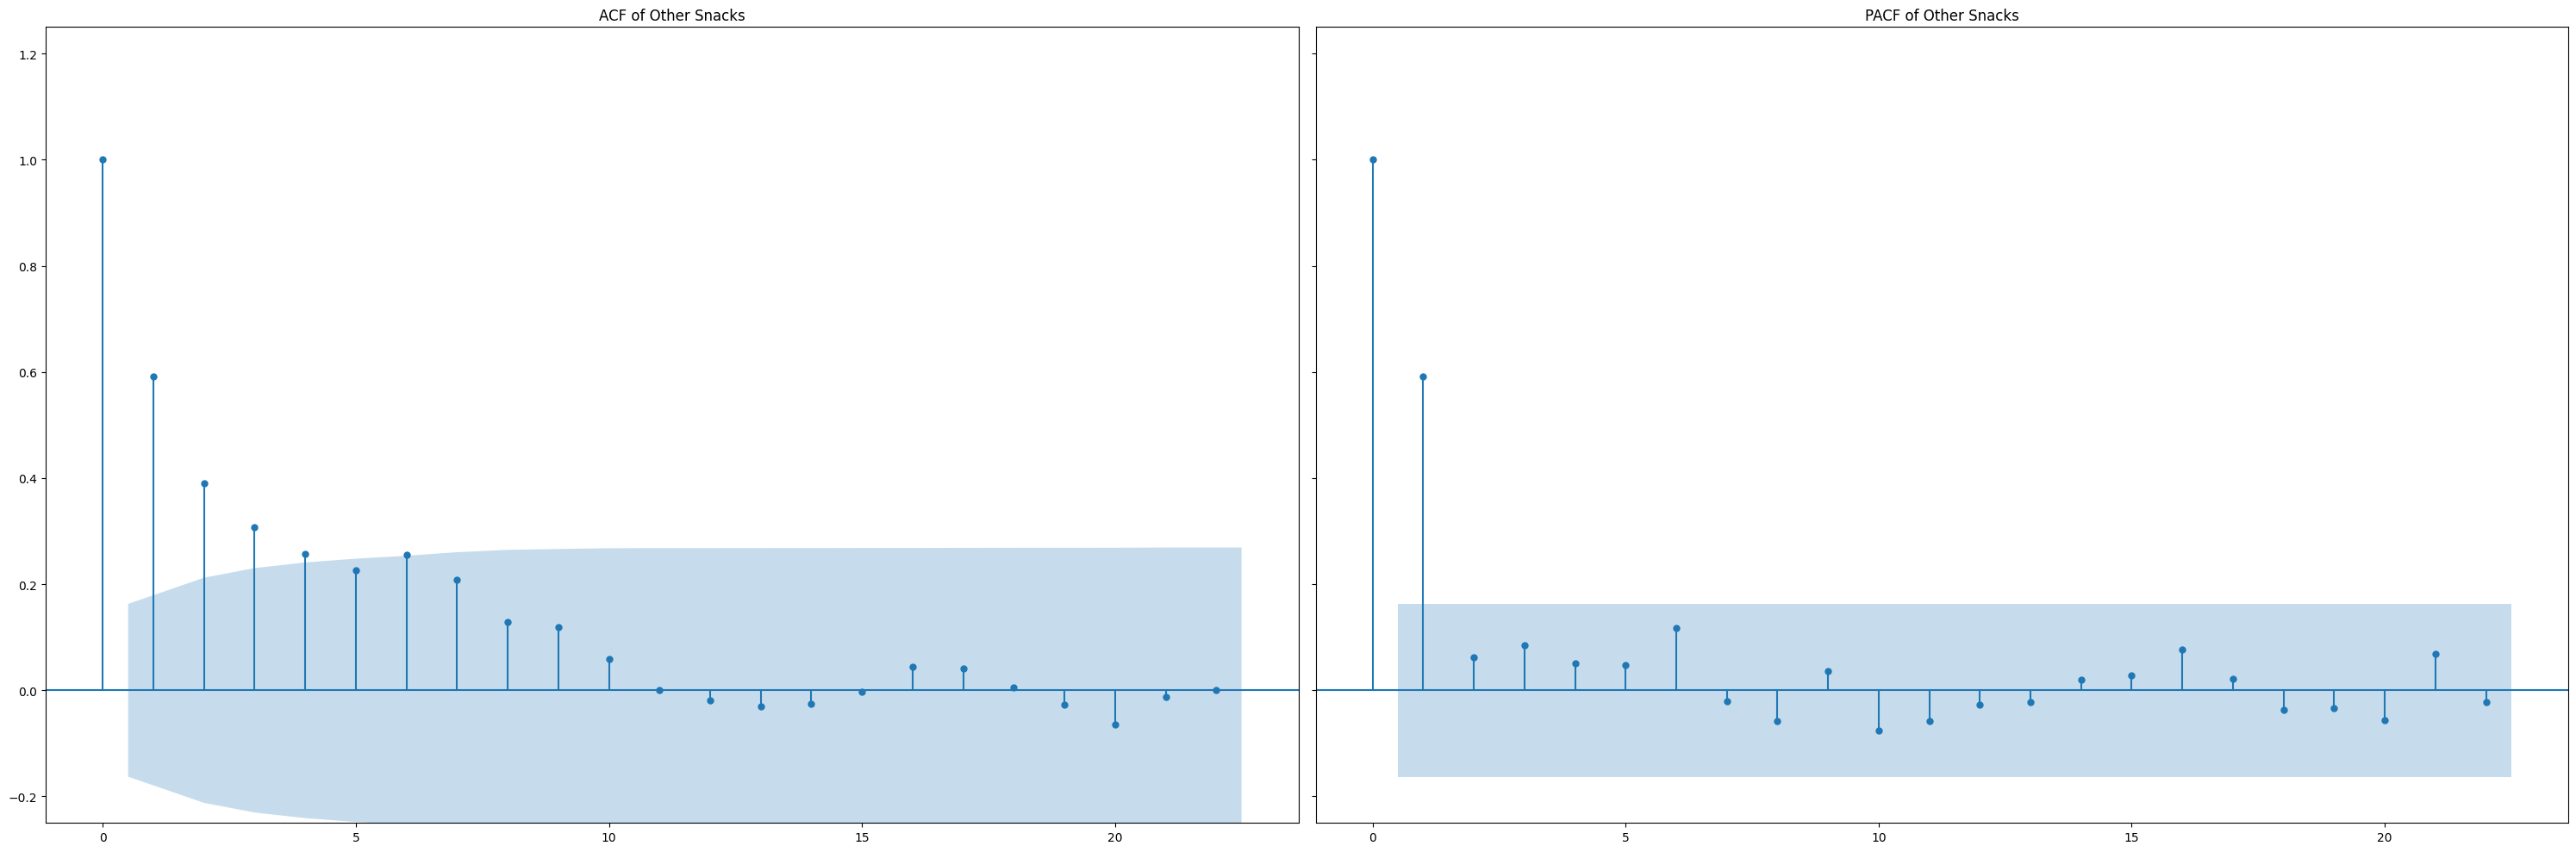

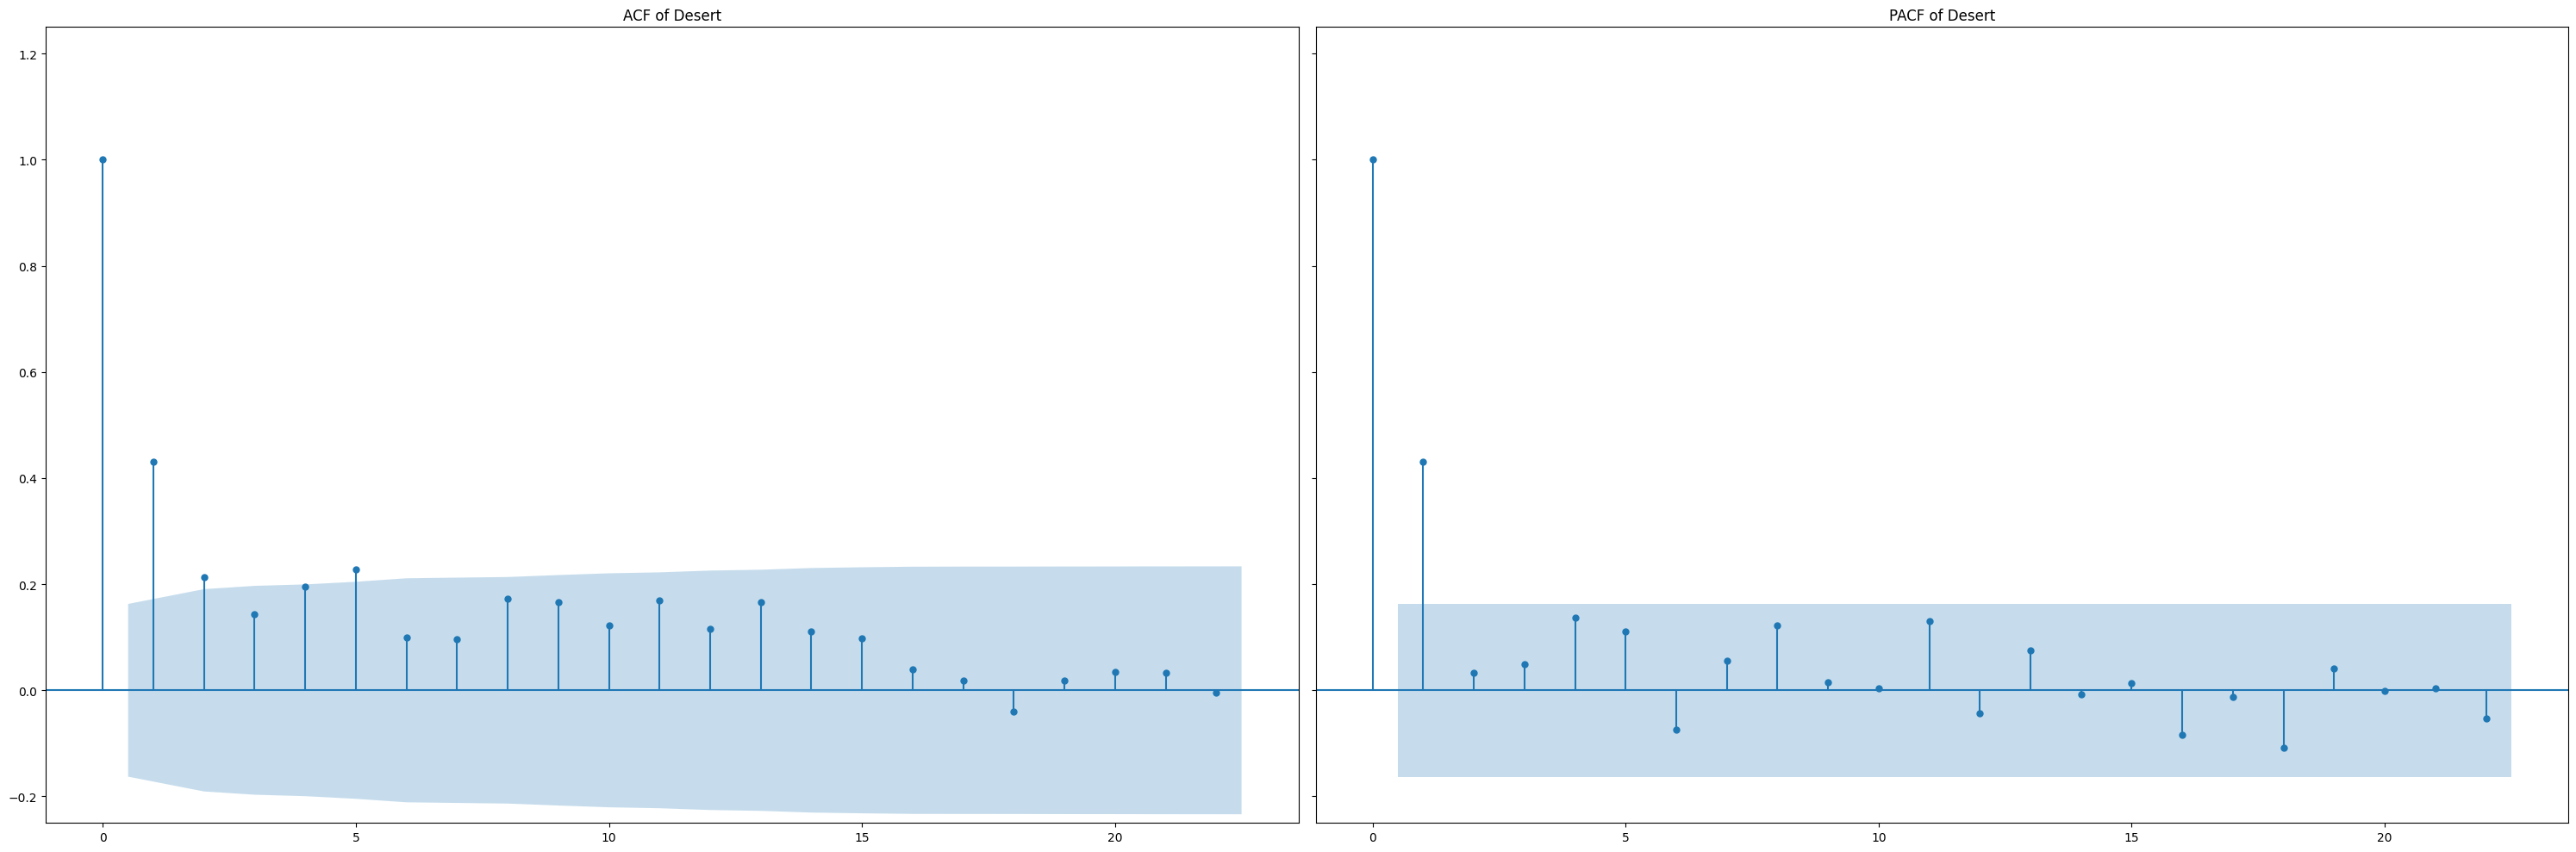

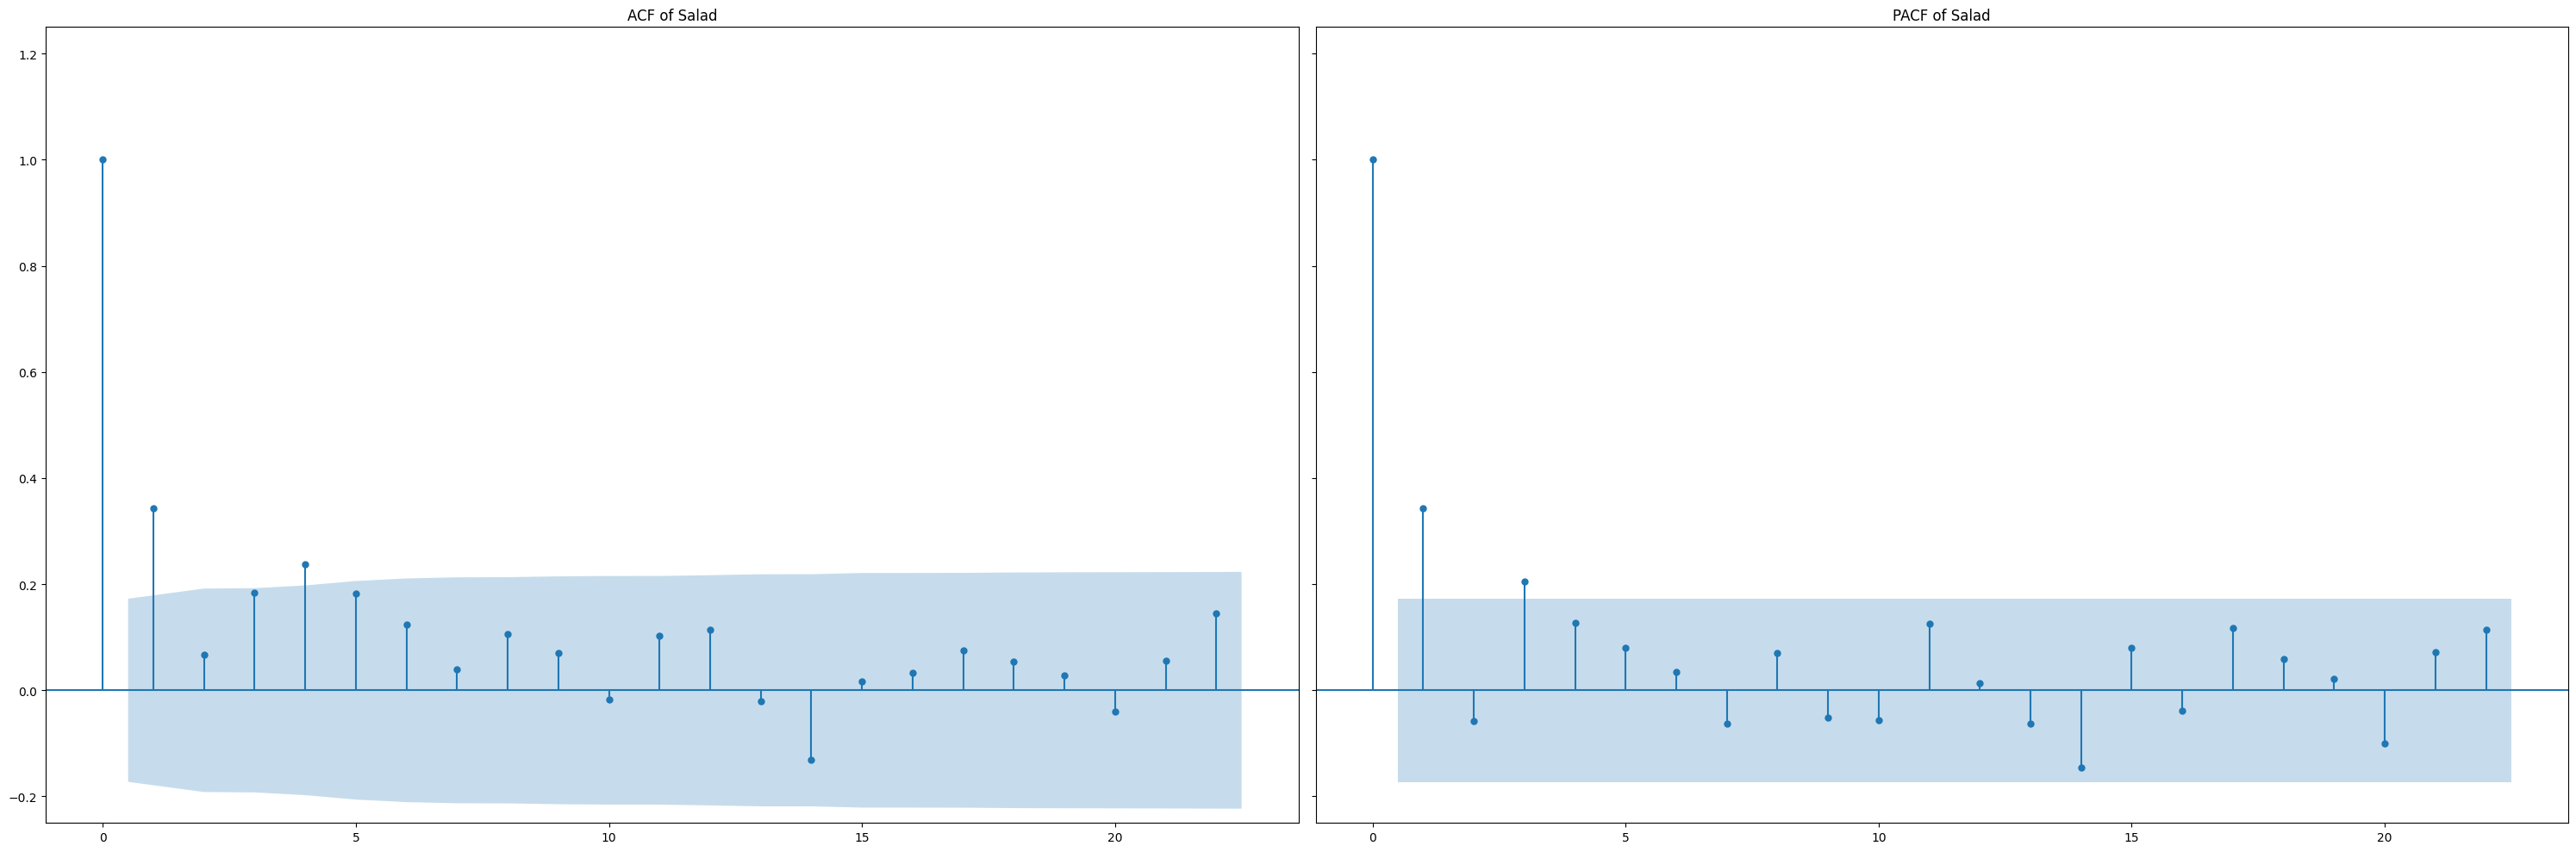

In [48]:
# ACF & PACF plots for the select food category we want to model for one center

center = 10
# categories = ['Rice Bowl', 'Sandwich', 'Pizza']
categories = list(stationarity_1_df.dropna(axis=1).columns)


for category in categories:   
    # select time series
    ts = result.loc[(center, category)]

    # plot acf (autocorrelation function)
    fig, axs = plt.subplots(1, 2,  figsize=(30, 10), sharey='all')
    plot_acf(ts, ax=axs[0])
    axs[0].set_title(f'ACF of {category}')
    
    # plot pacf (partial autocorrelation function)
    plot_pacf(ts, ax=axs[1])
    axs[1].set_title(f'PACF of {category}')

    # configure plot
    plt.ylim((-.25, 1.25))
    plt.tight_layout();



In [49]:
# lets look at one center and one food category
center = 10 
food_category = 'Starters'

train_data = main.loc[(center, food_category)][:140]
test_data = main.loc[(center, food_category)][140:]

train_data_mean = train_data.mean()
train_data_baseline = [train_data_mean] * len(train_data)

mae_baseline = mean_absolute_error(train_data, train_data_baseline)
print("Mean P2 Reading:", round(train_data_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: num_orders    934.64
dtype: float64
Baseline MAE: 221.31


C:\Users\mahad\AppData\Local\Temp\ipykernel_60360\2759110225.py:5: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mahad\AppData\Local\Temp\ipykernel_60360\2759110225.py:6: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [50]:
#  model beverages time series (just one)
order = (31, 0, 1) # 20 AR, 0 Diff, 1 MA

# fit model
model = ARIMA(train_data.squeeze(), order=order).fit()

# take some predictions
train_pred = model.predict()

# view model summary
model.summary()

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             num_orders   No. Observations:                  140
Model:                ARIMA(31, 0, 1)   Log Likelihood                -951.610
Date:                Sun, 08 Dec 2024   AIC                           1971.220
Time:                        20:02:56   BIC                           2071.235
Sample:                             0   HQIC                          2011.863
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        934.8660     73.640     12.695      0.000     790.535    1079.197
ar.L1          0.4007      2.540      0.158      0.875      -4.579       5.380
ar.L2          0.3076      1.780      0.173      0.863      -3.181       3.796
ar.L3         -0.1093      0.307     -0.356      0.722      -0.712       0.493
ar.L4         -0.1446      0.379     -0.381      0.703      -0.888       0.599
ar.L5          0.0968      0.294      0.329      0.742      -0.480       0.673
ar.L6         -0.0106      0.355     -0.030      0.976      -0.707       0.685
ar.L7         -0.0409      0.178     -0.230      0.818      -0.390       0.308
ar.L8          0.2189      0.147      1.492      0.136      -0.069       0.506
ar.L9         -0.0476      0.593     -0.080      0.936      -1.209       1.114
ar.L10        -0.0979      0.327     -0.300      0.764      -0.738       0.542
ar.L11         0.1648      0.242      0.681      0.496      -0.309       0.639
ar.L12        -0.1167      0.488     -0.239      0.811      -1.073       0.840
ar.L13        -0.0945      0.482     -0.196      0.844      -1.038       0.849
ar.L14         0.1172      0.191      0.613      0.540      -0.258       0.492
ar.L15         0.1205      0.388      0.310      0.756      -0.641       0.882
ar.L16        -0.1940      0.267     -0.726      0.468      -0.718       0.330
ar.L17        -0.0515      0.606     -0.085      0.932      -1.239       1.136
ar.L18         0.1792      0.171      1.048      0.295      -0.156       0.514
ar.L19        -0.0722      0.483     -0.149      0.881      -1.019       0.875
ar.L20        -0.1203      0.316     -0.380      0.704      -0.740       0.499
ar.L21         0.1203      0.294      0.409      0.682      -0.455       0.696
ar.L22         0.1174      0.442      0.266      0.791      -0.749       0.984
ar.L23        -0.0833      0.200     -0.417      0.677      -0.475       0.308
ar.L24        -0.0786      0.310     -0.254      0.800      -0.686       0.529
ar.L25        -0.0729      0.173     -0.421      0.674      -0.412       0.266
ar.L26        -0.0166      0.190     -0.087      0.931      -0.389       0.356
ar.L27         0.0480      0.159      0.303      0.762      -0.263       0.359
ar.L28         0.1249      0.200      0.623      0.533      -0.268       0.518
ar.L29        -0.2056      0.319     -0.645      0.519      -0.831       0.419
ar.L30         0.0673      0.670      0.101      0.920      -1.245       1.380
ar.L31        -0.0181      0.349     -0.052      0.959      -0.703       0.667
ma.L1          0.3029      2.564      0.118      0.906      -4.722       5.328
sigma2      4.561e+04   6101.487      7.475      0.000    3.37e+04    5.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                39.75
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                

In [51]:
mae = mean_absolute_error(train_data, train_pred)
np.round(mae, 3)

161.253

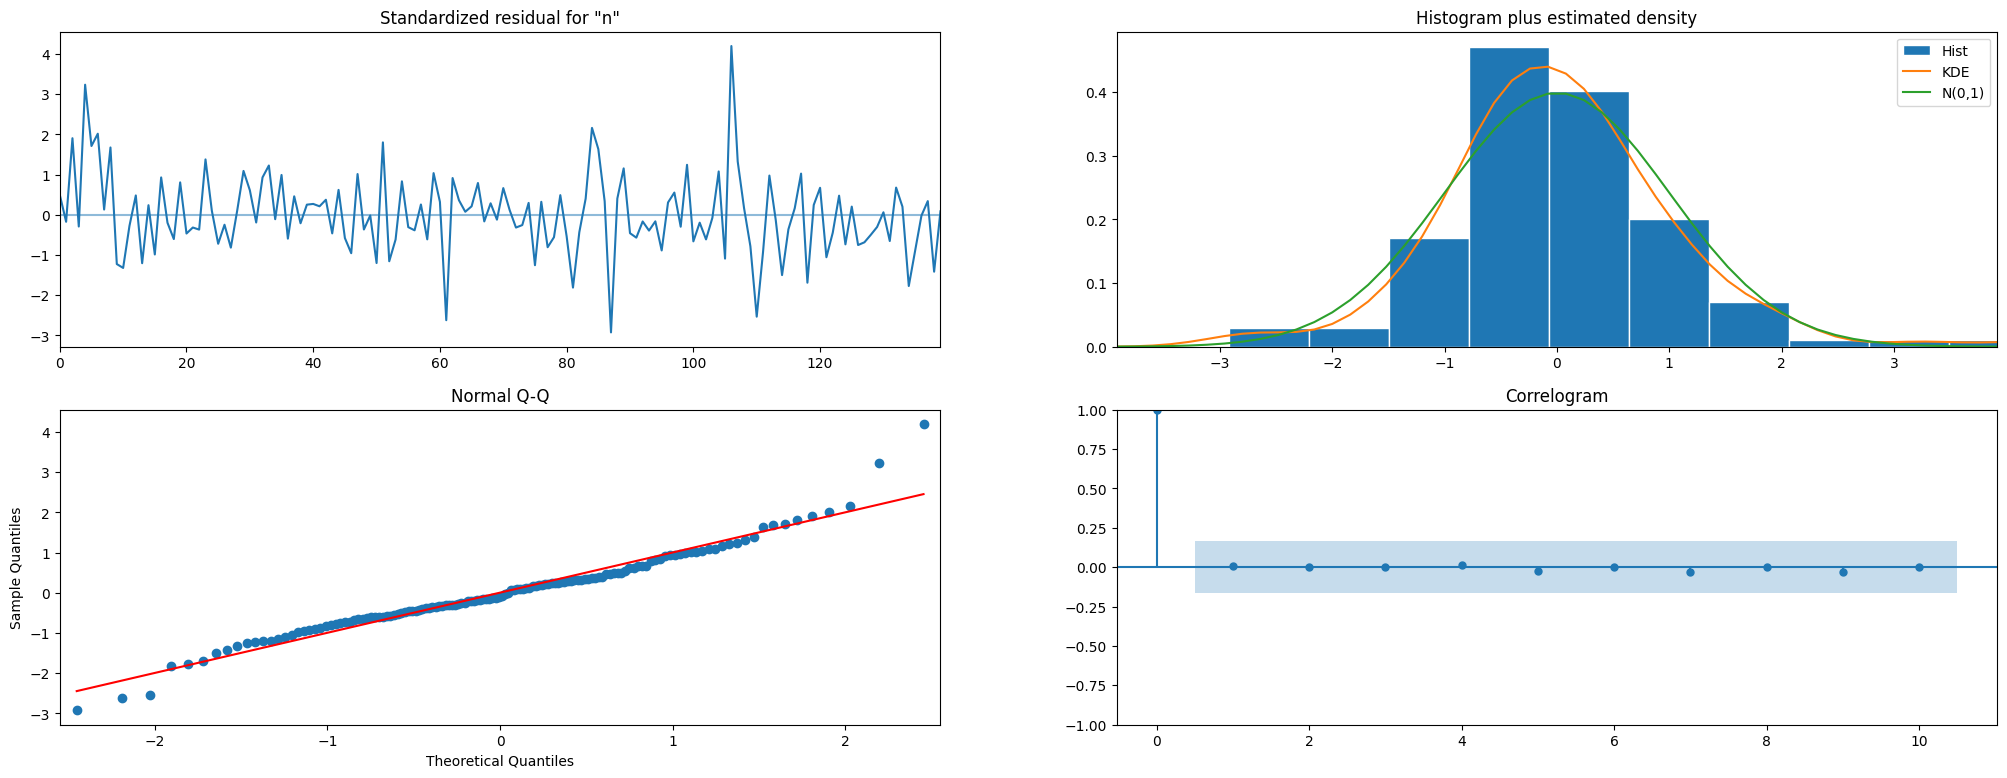

In [52]:
fig = plt.figure(figsize=(25, 9))
model.plot_diagnostics(fig=fig);

<Axes: >

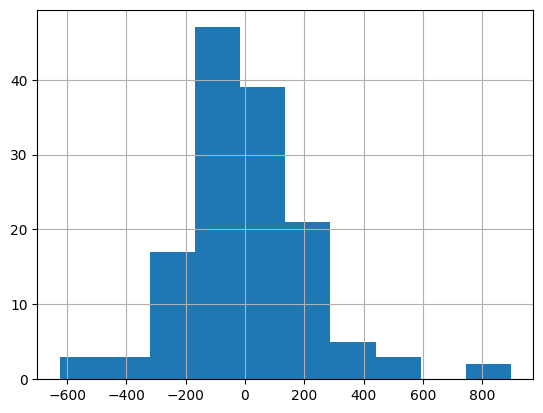

In [53]:
model.resid.hist()

In [54]:
model.resid.describe()

count    140.000000
mean       2.841919
std      219.352986
min     -624.271648
25%     -123.865566
50%      -19.449007
75%      106.120027
max      896.669408
dtype: float64

In [55]:
# visualize results

df_true_pred = pd.DataFrame(
    {
        'train_true': train_data.squeeze(),
        'train_pred': train_pred
    }
)

fig = px.line(df_true_pred, labels={'value':'Food Demand'}, title=f'True value vs Predicted value for {food_category} meals Demand in center {center}')
fig.show()

#### Inference

In [56]:
test_pred = model.forecast(steps=len(test_data))
test_pred.index = test_pred.index + 1 # increment index to reflect correct weekly pred
df_true_pred_wfv = pd.DataFrame(
    {'test_true':test_data.squeeze(), 'test_pred':test_pred}
)
fig = px.line(df_true_pred_wfv, labels={'value':'Food Demand'})

fig.show();

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [57]:
pred_wfv = list()
history = train_data.copy()

for i in range(len(test_data.index)):
    model = ARIMA(history.squeeze(), order=order).fit()
    
    next_pred = model.forecast()
    
    pred_wfv.append(next_pred.iloc[0])
    # next_ix = history.index[-1] + 1
    
    history = pd.concat((history, test_data.iloc[i-1:i]))

pred_wfv = pd.Series(pred_wfv, index=test_data.index)

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be gi

In [59]:
df_true_pred_wfv = pd.DataFrame(
    {'test_true':test_data.squeeze(), 'pred_wfv':pred_wfv}
)
fig = px.line(df_true_pred_wfv, labels={'value':'Food Demand'})

fig.show();

In [60]:
# save the model
import pickle 
with open(f'model_starters_{str(order)}.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
next_pred.iloc[0]

681.4450771809152

In [67]:
!python3 inference.py model_starters_\(20,\ 0,\ 1\).pkl

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [79]:
model.save('model_results.pkl')